In [3]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
 pip install dask

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from scipy import stats

In [7]:
# importamos datos
dataset2 = 'C:/Users/wmanj/OneDrive/Escritorio/SeriesDeTiempo/trabajo final/dataset2.xlsx'
data= pd.read_excel(dataset2)
print(data.head())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


In [8]:

ruta = r'C:/Users/wmanj/OneDrive/Escritorio/SeriesDeTiempo/trabajo final/dataset2.xlsx'

# Cargar todas las hojas en un diccionario
dataset2 = pd.read_excel(ruta, sheet_name=None)

# Ver los nombres de las hojas
print(dataset2.keys())  # Muestra los nombres de las hojas disponibles


dict_keys(['Year 2009-2010', 'Year 2010-2011'])


In [9]:
# Concatenar todas las hojas en un solo DataFrame
df_completo = pd.concat(dataset2.values(), ignore_index=True)

# Mostrar las primeras filas
print(df_completo.head())


  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


In [10]:
# Número de filas y columnas
filas, columnas = df_completo.shape
print(f"El DataFrame tiene {filas} filas y {columnas} columnas.")

# Número total de datos (celdas)
total_datos = df_completo.size
print(f"El DataFrame contiene un total de {total_datos} datos (celdas).")
data = df_completo


El DataFrame tiene 1067371 filas y 8 columnas.
El DataFrame contiene un total de 8538968 datos (celdas).


ANALISIS PRELIMINAR

In [11]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [12]:
# Identificar valores nulos en cada DataFrame
print("\nValores nulos en online retail:")
print(data.isnull().sum())



Valores nulos en online retail:
Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64


In [13]:
# Estadística descriptiva
estadisticas_descriptivas = data.describe()
print(estadisticas_descriptivas)

           Quantity                    InvoiceDate         Price  \
count  1.067371e+06                        1067371  1.067371e+06   
mean   9.938898e+00  2011-01-02 21:13:55.394028544  4.649388e+00   
min   -8.099500e+04            2009-12-01 07:45:00 -5.359436e+04   
25%    1.000000e+00            2010-07-09 09:46:00  1.250000e+00   
50%    3.000000e+00            2010-12-07 15:28:00  2.100000e+00   
75%    1.000000e+01            2011-07-22 10:23:00  4.150000e+00   
max    8.099500e+04            2011-12-09 12:50:00  3.897000e+04   
std    1.727058e+02                            NaN  1.235531e+02   

         Customer ID  
count  824364.000000  
mean    15324.638504  
min     12346.000000  
25%     13975.000000  
50%     15255.000000  
75%     16797.000000  
max     18287.000000  
std      1697.464450  


VISUALIZACIÓN DE LA SERIE

In [14]:
# Asegúrate de que 'DATE_TIME' esté en formato datetime
data['DATE_TIME'] = pd.to_datetime(data['InvoiceDate'])

In [15]:
import pandas as pd

# Suponiendo que df_completo ya contiene la columna 'InvoiceDate' y 'Quantity'

# Asegurarse de que la columna 'InvoiceDate' sea de tipo datetime
df_completo['InvoiceDate'] = pd.to_datetime(df_completo['InvoiceDate'])

# Crear una nueva columna 'Month' que contenga el mes correspondiente a cada transacción
df_completo['Month'] = df_completo['InvoiceDate'].dt.to_period('M')

# Calcular el acumulado de 'Quantity' por mes
df_completo['Cumulative_Quantity'] = df_completo.groupby('Month')['Quantity'].cumsum()

# Mostrar el DataFrame con el acumulado mensual
print(df_completo)


        Invoice StockCode                          Description  Quantity  \
0        489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1        489434    79323P                   PINK CHERRY LIGHTS        12   
2        489434    79323W                  WHITE CHERRY LIGHTS        12   
3        489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4        489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...         ...       ...                                  ...       ...   
1067366  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
1067367  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
1067368  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
1067369  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
1067370  581587      POST                              POSTAGE         1   

                InvoiceDate  Price  Customer ID         Country  \
0       2009-12-01 0

In [16]:
# Creando tabla de fecha díaria y promedio diario de velocidad del viento
df_daily_avg= data.groupby(data['DATE_TIME'].dt.to_period('D'))['Quantity'].mean().reset_index()
df_daily_avg1= data.groupby(data['DATE_TIME'].dt.to_period('D'))['Price'].mean().reset_index()
# Agrupar por semana y calcular el promedio de 'Quantity' y 'Price'
df_weekly_avg = data.groupby(data['DATE_TIME'].dt.to_period('W'))['Quantity'].mean().reset_index()
df_weekly_avg1 = data.groupby(data['DATE_TIME'].dt.to_period('W'))['Price'].mean().reset_index()
# Agrupar por mes y calcular el promedio de 'Quantity' y 'Price'
df_monthly_avg = data.groupby(data['DATE_TIME'].dt.to_period('M'))['Quantity'].mean().reset_index()
df_monthly_avg1 = data.groupby(data['DATE_TIME'].dt.to_period('M'))['Price'].mean().reset_index()
# Agrupar por año y calcular el promedio de 'Quantity' y 'Price'
df_yearly_avg = data.groupby(data['DATE_TIME'].dt.to_period('A'))['Quantity'].mean().reset_index()
df_yearly_avg1 = data.groupby(data['DATE_TIME'].dt.to_period('A'))['Price'].mean().reset_index()


C:\Users\wmanj\AppData\Local\Temp\ipykernel_15920\637406707.py:11: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'Y' instead.
  df_yearly_avg = data.groupby(data['DATE_TIME'].dt.to_period('A'))['Quantity'].mean().reset_index()
C:\Users\wmanj\AppData\Local\Temp\ipykernel_15920\637406707.py:12: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'Y' instead.
  df_yearly_avg1 = data.groupby(data['DATE_TIME'].dt.to_period('A'))['Price'].mean().reset_index()


In [17]:
df_monthly_avg.head()



,DATE_TIME,Quantity
0,2009-12,9.288229
1,2010-01,11.895516
2,2010-02,12.535797
3,2010-03,11.788923
4,2010-04,10.334762


In [18]:
df_daily_avg1.head()

,DATE_TIME,Price
0,2009-12-01,4.483568
1,2009-12-02,4.092756
2,2009-12-03,4.427132
3,2009-12-04,3.785572
4,2009-12-05,3.590199


In [19]:
print(data.dtypes)
for col in data.select_dtypes(include=['object']).columns:
    print(f"Unique values in {col}:", data[col].unique()[:10])  # Show first 10 unique values
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Convert text to NaN


Invoice                        object
StockCode                      object
Description                    object
Quantity                        int64
InvoiceDate            datetime64[ns]
Price                         float64
Customer ID                   float64
Country                        object
DATE_TIME              datetime64[ns]
Month                       period[M]
Cumulative_Quantity             int64
dtype: object
Unique values in Invoice: [489434 489435 489436 489437 489438 489439 489440 489441 489442 489443]
Unique values in StockCode: [85048 '79323P' '79323W' 22041 21232 22064 21871 21523 22350 22349]
Unique values in Description: ['15CM CHRISTMAS GLASS BALL 20 LIGHTS' 'PINK CHERRY LIGHTS'
 ' WHITE CHERRY LIGHTS' 'RECORD FRAME 7" SINGLE SIZE '
 'STRAWBERRY CERAMIC TRINKET BOX' 'PINK DOUGHNUT TRINKET POT '
 'SAVE THE PLANET MUG' 'FANCY FONT HOME SWEET HOME DOORMAT' 'CAT BOWL '
 'DOG BOWL , CHASING BALL DESIGN']
Unique values in Country: ['United Kingdom' 'France' 'USA' 

In [20]:
# Asegurar que DATE_TIME es de tipo datetime
data['DATE_TIME'] = pd.to_datetime(data['DATE_TIME'])

# Agrupar por fecha diaria y calcular los promedios
df_daily_avg_quantity = data.groupby(data['DATE_TIME'].dt.date)['Quantity'].mean().reset_index()
df_daily_avg_price = data.groupby(data['DATE_TIME'].dt.date)['Price'].mean().reset_index()

# Renombrar la columna DATE_TIME para mantener consistencia
df_daily_avg_quantity.rename(columns={'DATE_TIME': 'DATE'}, inplace=True)
df_daily_avg_price.rename(columns={'DATE_TIME': 'DATE'}, inplace=True)

# Convertir la columna DATE a tipo datetime
df_daily_avg_quantity['DATE'] = pd.to_datetime(df_daily_avg_quantity['DATE'])
df_daily_avg_price['DATE'] = pd.to_datetime(df_daily_avg_price['DATE'])


In [21]:
import pandas as pd

# Asegurar que DATE_TIME es de tipo datetime
data['DATE_TIME'] = pd.to_datetime(data['DATE_TIME'])

# Agrupar por hora y calcular los promedios
df_hourly_avg_quantity = data.groupby(data['DATE_TIME'].dt.hour)['Quantity'].mean().reset_index()
df_hourly_avg_price = data.groupby(data['DATE_TIME'].dt.hour)['Price'].mean().reset_index()

# Renombrar la columna de la hora para mayor claridad
df_hourly_avg_quantity.rename(columns={'DATE_TIME': 'Hour'}, inplace=True)
df_hourly_avg_price.rename(columns={'DATE_TIME': 'Hour'}, inplace=True)

# Contar la cantidad de filas en los DataFrames generados
num_rows_quantity = df_hourly_avg_quantity.shape[0]
num_rows_price = df_hourly_avg_price.shape[0]

print(f"El DataFrame df_hourly_avg_quantity tiene {num_rows_quantity} filas.")
print(f"El DataFrame df_hourly_avg_price tiene {num_rows_price} filas.")


El DataFrame df_hourly_avg_quantity tiene 16 filas.
El DataFrame df_hourly_avg_price tiene 16 filas.


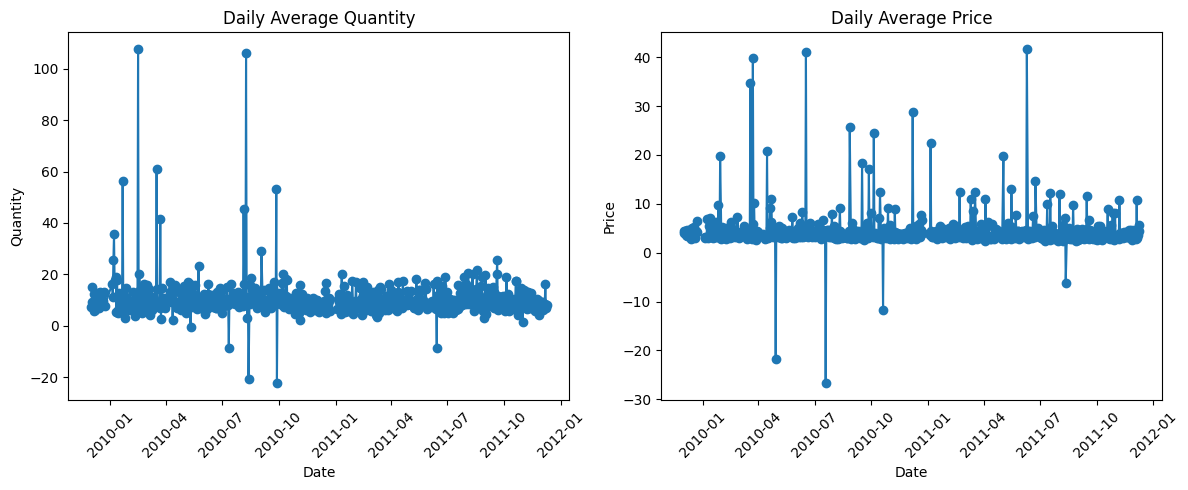

In [22]:
import matplotlib.pyplot as plt

# Crear una figura con 1 fila y 2 columnas
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfica de línea 1: Promedio de cantidad por día
axes[0].plot(df_daily_avg_quantity['DATE'], df_daily_avg_quantity['Quantity'], marker='o', linestyle='-')
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Quantity")
axes[0].set_title("Daily Average Quantity")
axes[0].tick_params(axis='x', rotation=45)

# Gráfica de línea 2: Promedio de precio por día
axes[1].plot(df_daily_avg_price['DATE'], df_daily_avg_price['Price'], marker='o', linestyle='-')
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Price")
axes[1].set_title("Daily Average Price")
axes[1].tick_params(axis='x', rotation=45)

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()
plt.show()



In [23]:
# Filtrar solo los valores no negativos de 'Quantity' en df_daily_avg_quantity
df_daily_avg_quantity = df_daily_avg_quantity[df_daily_avg_quantity['Quantity'] >= 0]

# Filtrar solo los valores no negativos de 'Price' en df_daily_avg_price
df_daily_avg_price = df_daily_avg_price[df_daily_avg_price['Price'] >= 0]

# Mostrar los primeros registros para verificar
df_daily_avg_quantity.head(), df_daily_avg_price.head()


(        DATE   Quantity
 0 2009-12-01   7.453304
 1 2009-12-02   9.137016
 2 2009-12-03  14.955363
 3 2009-12-04   8.206721
 4 2009-12-05  12.519900,
         DATE     Price
 0 2009-12-01  4.483568
 1 2009-12-02  4.092756
 2 2009-12-03  4.427132
 3 2009-12-04  3.785572
 4 2009-12-05  3.590199)

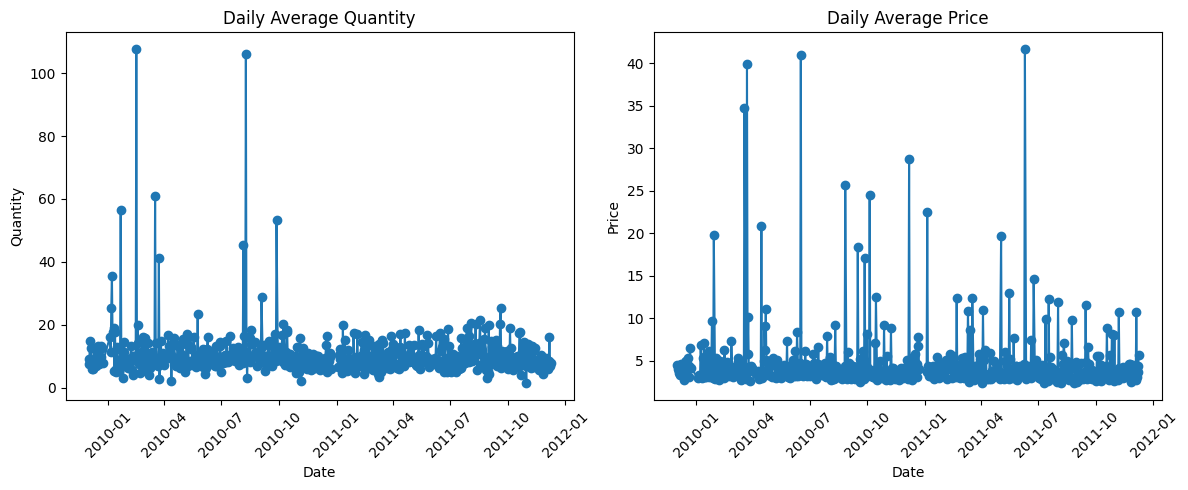

In [24]:
import matplotlib.pyplot as plt

# Filtrar valores negativos
df_daily_avg_quantity = df_daily_avg_quantity[df_daily_avg_quantity['Quantity'] >= 0]
df_daily_avg_price = df_daily_avg_price[df_daily_avg_price['Price'] >= 0]

# Crear una figura con 1 fila y 2 columnas
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfica de línea 1: Promedio de cantidad por día
axes[0].plot(df_daily_avg_quantity['DATE'], df_daily_avg_quantity['Quantity'], marker='o', linestyle='-')
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Quantity")
axes[0].set_title("Daily Average Quantity")
axes[0].tick_params(axis='x', rotation=45)

# Gráfica de línea 2: Promedio de precio por día
axes[1].plot(df_daily_avg_price['DATE'], df_daily_avg_price['Price'], marker='o', linestyle='-')
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Price")
axes[1].set_title("Daily Average Price")
axes[1].tick_params(axis='x', rotation=45)

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()
plt.show()


In [25]:
# Contar la cantidad de filas en df_daily_avg_quantity
num_rows = df_daily_avg_quantity.shape[0]

# Mostrar el resultado
print(f"El DataFrame tiene {num_rows} filas.")


El DataFrame tiene 599 filas.


In [26]:
# Asegúrate de que 'DATE_TIME' esté en formato datetime
data['DATE_TIME'] = pd.to_datetime(data['DATE_TIME'], errors='coerce')
# Ahora puedes usar .dt accessor
df_daily_avg_quantity = data.groupby(data['DATE_TIME'].dt.to_period('D'))['Quantity'].mean().reset_index()
df_daily_avg_price = data.groupby(data['DATE_TIME'].dt.to_period('D'))['Price'].mean().reset_index()
# Convertir Period a datetime
df_daily_avg_quantity['DATE_TIME'] = df_daily_avg_quantity['DATE_TIME'].dt.start_time
df_daily_avg_price['DATE_TIME'] = df_daily_avg_price['DATE_TIME'].dt.start_time
import pandas as pd

# Asegúrate de que 'DATE_TIME' esté en formato datetime
data['DATE_TIME'] = pd.to_datetime(data['DATE_TIME'], errors='coerce')

# Extraer la semana, mes y año
df_weekly_avg= data['DATE_TIME'].dt.isocalendar().week  # Cambio aquí
df_monthly_avg= data['DATE_TIME'].dt.month
df_yearly_avg['Año'] = data['DATE_TIME'].dt.year

# Agrupar por fecha diaria y calcular promedios
df_daily_avg_quantity = data.groupby(data['DATE_TIME'].dt.to_period('D'))['Quantity'].mean().reset_index()
df_daily_avg_price = data.groupby(data['DATE_TIME'].dt.to_period('D'))['Price'].mean().reset_index()

# Convertir Period a datetime
df_daily_avg_quantity['DATE_TIME'] = df_daily_avg_quantity['DATE_TIME'].dt.start_time
df_daily_avg_price['DATE_TIME'] = df_daily_avg_price['DATE_TIME'].dt.start_time

# Si quieres agregar la semana, mes y año al DataFrame de promedios, puedes hacerlo como sigue:
df_daily_avg_quantityW = df_daily_avg_quantity['DATE_TIME'].dt.isocalendar().week  # Cambio aquí
df_monthly_avg = df_daily_avg_quantity['DATE_TIME'].dt.month
df_daily_avg_quantityY = df_daily_avg_quantity['DATE_TIME'].dt.year

print(df_monthly_avg)


0      12
1      12
2      12
3      12
4      12
       ..
599    12
600    12
601    12
602    12
603    12
Name: DATE_TIME, Length: 604, dtype: int32


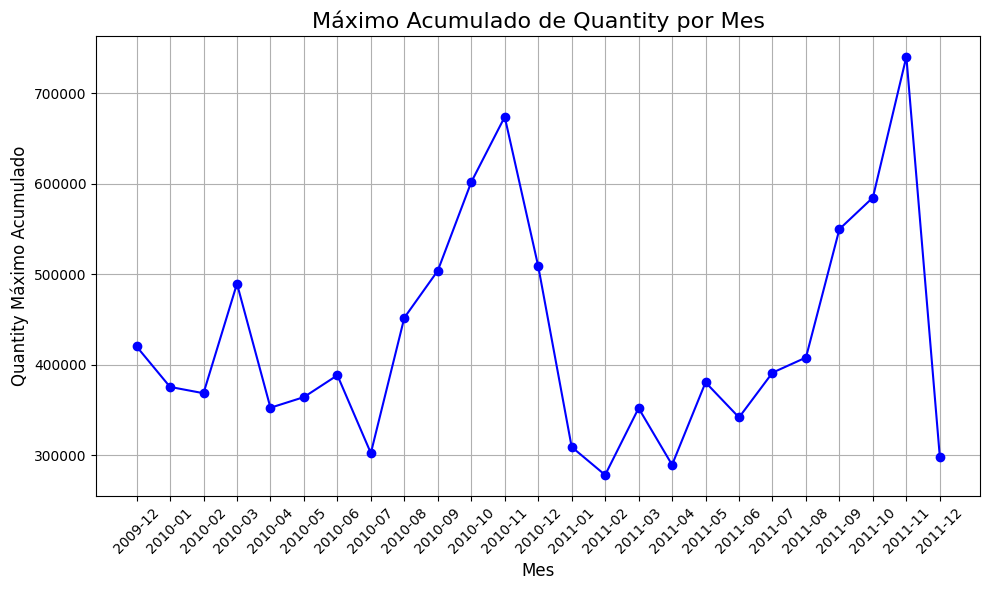

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que df_completo ya contiene las columnas 'InvoiceDate', 'Quantity', y 'Month'

# Asegurarse de que la columna 'InvoiceDate' sea de tipo datetime
df_completo['InvoiceDate'] = pd.to_datetime(df_completo['InvoiceDate'])

# Crear una nueva columna 'Month' que contenga el mes correspondiente a cada transacción
df_completo['Month'] = df_completo['InvoiceDate'].dt.to_period('M')

# Calcular el acumulado de 'Quantity' por mes
df_completo['Cumulative_Quantity'] = df_completo.groupby('Month')['Quantity'].cumsum()

# Agrupar por mes y obtener el valor máximo acumulado de 'Quantity' por mes
df_monthly_max = df_completo.groupby('Month')['Cumulative_Quantity'].max().reset_index()

# Graficar el máximo acumulado de 'Quantity' por mes
plt.figure(figsize=(10, 6))
plt.plot(df_monthly_max['Month'].astype(str), df_monthly_max['Cumulative_Quantity'], marker='o', linestyle='-', color='b')
plt.title('Máximo Acumulado de Quantity por Mes', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Quantity Máximo Acumulado', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [28]:
import matplotlib.pyplot as plt

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(df_monthly_avg['DATE_TIME'].astype(str), df_monthly_avg['Quantity'], marker='o', color='b', linestyle='-', markersize=5)

# Etiquetas y título
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Promedio de Quantity', fontsize=12)
plt.title('Promedio Mensual de Quantity', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar gráfico
plt.show()





KeyError: 'DATE_TIME'

<Figure size 1000x600 with 0 Axes>

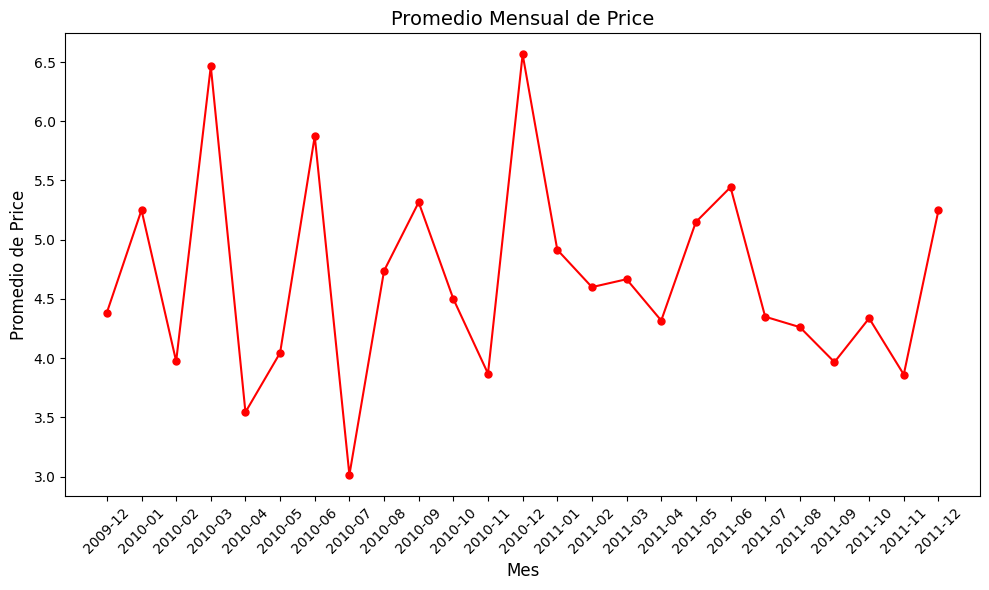

In [30]:
import matplotlib.pyplot as plt

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(df_monthly_avg1['DATE_TIME'].astype(str), df_monthly_avg1['Price'], marker='o', color='r', linestyle='-', markersize=5)

# Etiquetas y título
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Promedio de Price', fontsize=12)
plt.title('Promedio Mensual de Price', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar gráfico
plt.show()




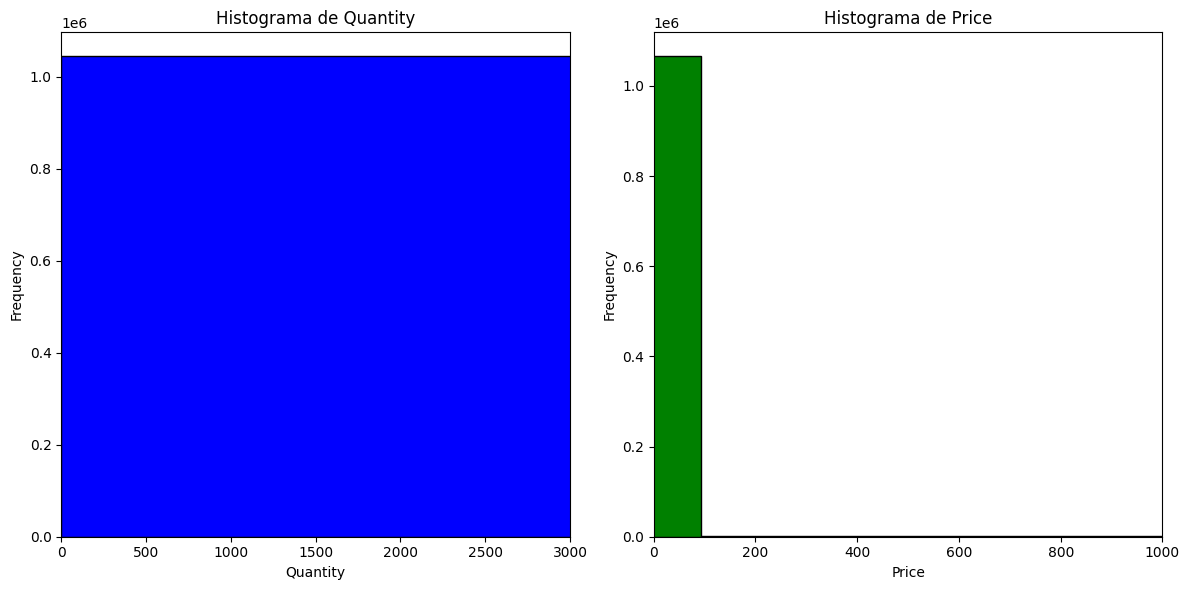

In [31]:
import matplotlib.pyplot as plt

# Crear histogramas de 'Quantity' y 'Price' en una sola figura con 1 fila y 2 columnas
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histograma de 'Quantity'
axes[0].hist(df_completo['Quantity'], bins=30, color='b', edgecolor='black')
axes[0].set_xlabel("Quantity")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Histograma de Quantity")

# Limitar el eje X del histograma de 'Quantity' entre 0 y 100
axes[0].set_xlim([0, 3000])

# Histograma de 'Price'
axes[1].hist(df_completo['Price'], bins=50, color='g', edgecolor='black')
axes[1].set_xlabel("Price")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Histograma de Price")

# Limitar el eje X del histograma de 'Price' entre 0 y 100
axes[1].set_xlim([0, 1000])

# Ajustar el espaciado entre las gráficas
plt.tight_layout()

# Mostrar los histogramas
plt.show()


C:\Users\wmanj\AppData\Local\Temp\ipykernel_15920\2188266340.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2010['Month'] = data_2010['DATE_TIME'].dt.month


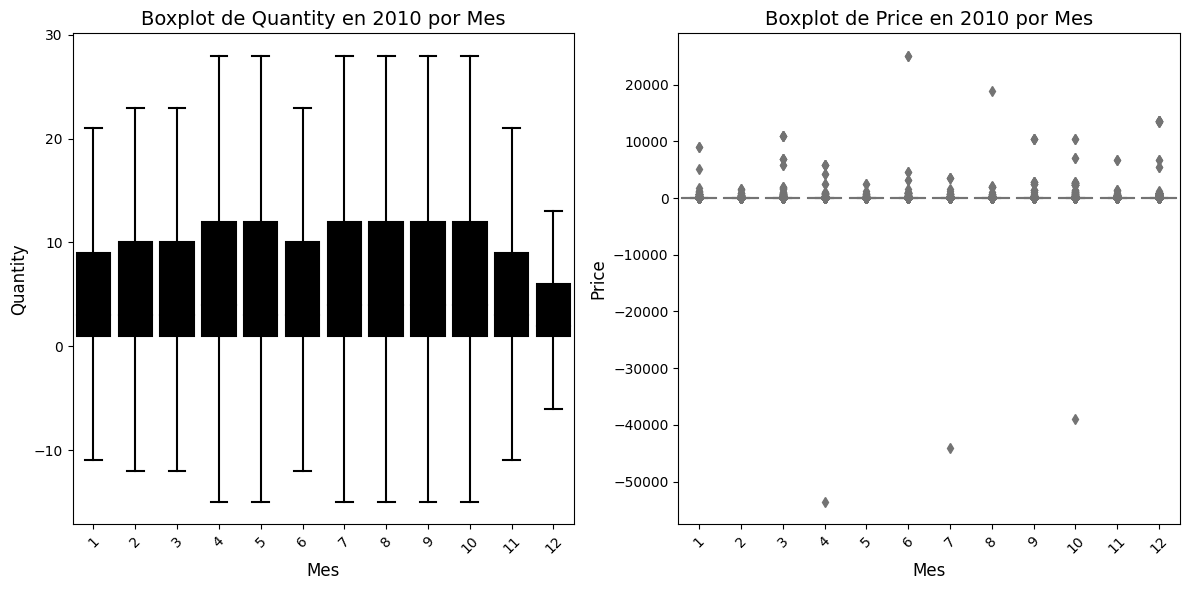

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asegurarse de que 'DATE_TIME' esté en formato datetime
df_completo['DATE_TIME'] = pd.to_datetime(df_completo['DATE_TIME'], errors='coerce')

# Filtrar los datos para el año 2010
data_2010 = df_completo[df_completo['DATE_TIME'].dt.year == 2010]

# Extraer el mes de la columna 'DATE_TIME'
data_2010['Month'] = data_2010['DATE_TIME'].dt.month

# Crear una figura con 1 fila y 2 columnas
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfica de caja y bigote para 'Quantity' en 2010
sns.boxplot(x=data_2010['Month'], y=data_2010['Quantity'], ax=axes[0], color='black', showfliers=False)
axes[0].set_xlabel("Mes", fontsize=12)
axes[0].set_ylabel("Quantity", fontsize=12)
axes[0].set_title("Boxplot de Quantity en 2010 por Mes", fontsize=14)
axes[0].tick_params(axis='x', rotation=45)

# Gráfica de caja y bigote para 'Price' en 2010
sns.boxplot(x=data_2010['Month'], y=data_2010['Price'], ax=axes[1], color='lightgreen', showfliers=True)
axes[1].set_xlabel("Mes", fontsize=12)
axes[1].set_ylabel("Price", fontsize=12)
axes[1].set_title("Boxplot de Price en 2010 por Mes", fontsize=14)
axes[1].tick_params(axis='x', rotation=45)

# Ajustar el espaciado entre las gráficas
plt.tight_layout()

# Mostrar las gráficas
plt.show()


C:\Users\wmanj\AppData\Local\Temp\ipykernel_15920\2428825226.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2011['Month'] = data_2011['DATE_TIME'].dt.month


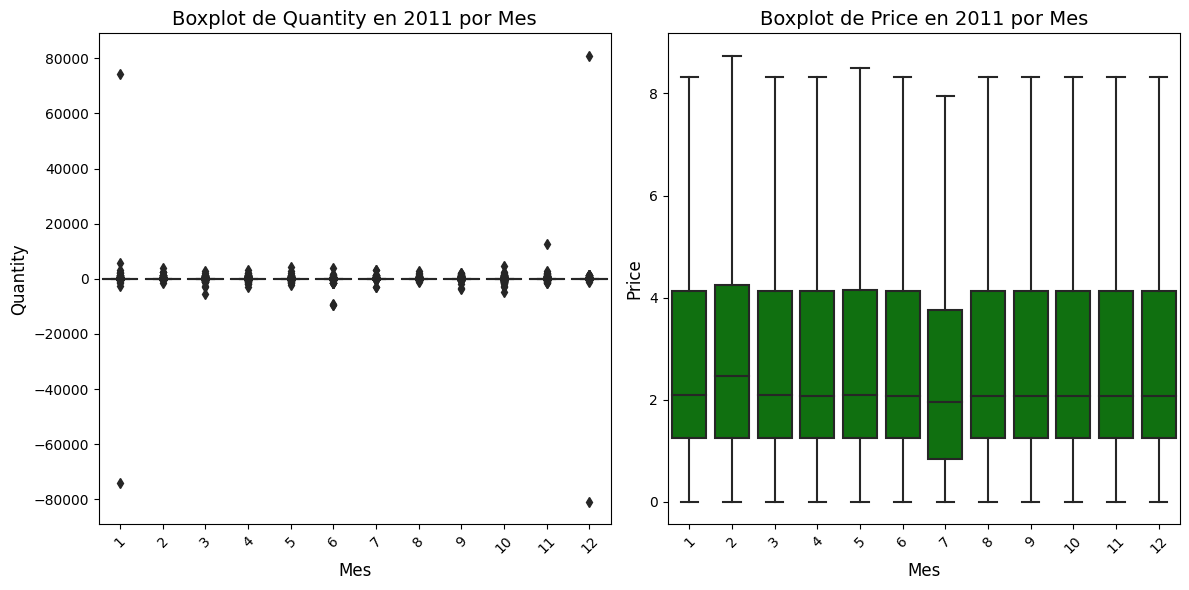

In [37]:
# Filtrar los datos para el año 2011
data_2011 = df_completo[df_completo['DATE_TIME'].dt.year == 2011]

# Extraer el mes de la columna 'DATE_TIME'
data_2011['Month'] = data_2011['DATE_TIME'].dt.month

# Crear una figura con 1 fila y 2 columnas
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfica de caja y bigote para 'Quantity' en 2011
sns.boxplot(x=data_2011['Month'], y=data_2011['Quantity'], ax=axes[0], color='green', showfliers=True)
axes[0].set_xlabel("Mes", fontsize=12)
axes[0].set_ylabel("Quantity", fontsize=12)
axes[0].set_title("Boxplot de Quantity en 2011 por Mes", fontsize=14)
axes[0].tick_params(axis='x', rotation=45)

# Gráfica de caja y bigote para 'Price' en 2011
sns.boxplot(x=data_2011['Month'], y=data_2011['Price'], ax=axes[1], color='green', showfliers=False)
axes[1].set_xlabel("Mes", fontsize=12)
axes[1].set_ylabel("Price", fontsize=12)
axes[1].set_title("Boxplot de Price en 2011 por Mes", fontsize=14)
axes[1].tick_params(axis='x', rotation=45)

# Ajustar el espaciado entre las gráficas
plt.tight_layout()

# Mostrar las gráficas
plt.show()


In [38]:
# Asegúrate de que 'Product' y 'Quantity' son las columnas correctas
# Agrupar por producto y obtener la suma de la cantidad vendida y el precio promedio
top_20_products = df_completo.groupby('Description').agg({'Quantity': 'sum', 'Price': 'mean'}).reset_index()

# Ordenar los productos por cantidad de ventas de mayor a menor
top_20_products = top_20_products.sort_values(by='Quantity', ascending=False).head(20)

# Mostrar el top 20 de productos más vendidos con su precio promedio
print(top_20_products)



   Description  Quantity  Price
3      22719.0         2    0.0
2      22467.0        -2    0.0
0      20713.0      -400    0.0
1      21494.0      -720    0.0


Gráficas de Autocorrelación

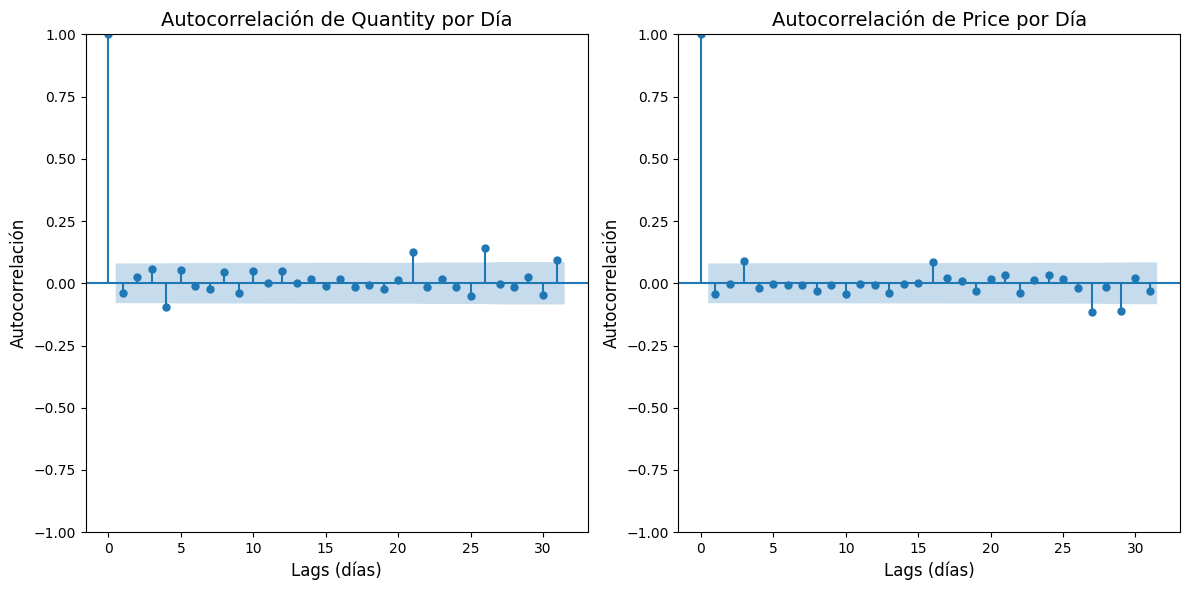

In [42]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Crear una figura con 1 fila y 2 columnas
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfica de autocorrelación para 'Quantity' (por día)
plot_acf(df_daily_avg['Quantity'], lags=31, ax=axes[0])
axes[0].set_title("Autocorrelación de Quantity por Día", fontsize=14)
axes[0].set_xlabel("Lags (días)", fontsize=12)
axes[0].set_ylabel("Autocorrelación", fontsize=12)

# Gráfica de autocorrelación para 'Price' (por día)
plot_acf(df_daily_avg1['Price'], lags=31, ax=axes[1])
axes[1].set_title("Autocorrelación de Price por Día", fontsize=14)
axes[1].set_xlabel("Lags (días)", fontsize=12)
axes[1].set_ylabel("Autocorrelación", fontsize=12)

# Ajustar el espaciado entre las gráficas
plt.tight_layout()

# Mostrar ambas gráficas
plt.show()


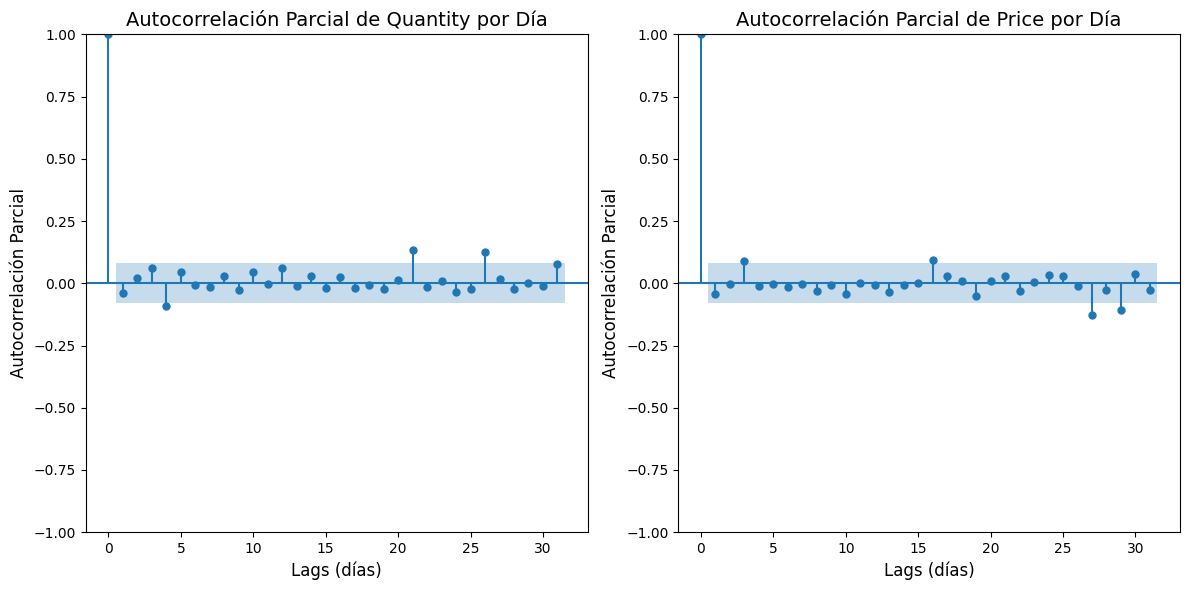

In [43]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Crear una figura con 1 fila y 2 columnas
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfica de autocorrelación parcial para 'Quantity' (por día)
plot_pacf(df_daily_avg['Quantity'], lags=31, ax=axes[0])
axes[0].set_title("Autocorrelación Parcial de Quantity por Día", fontsize=14)
axes[0].set_xlabel("Lags (días)", fontsize=12)
axes[0].set_ylabel("Autocorrelación Parcial", fontsize=12)

# Gráfica de autocorrelación parcial para 'Price' (por día)
plot_pacf(df_daily_avg1['Price'], lags=31, ax=axes[1])
axes[1].set_title("Autocorrelación Parcial de Price por Día", fontsize=14)
axes[1].set_xlabel("Lags (días)", fontsize=12)
axes[1].set_ylabel("Autocorrelación Parcial", fontsize=12)

# Ajustar el espaciado entre las gráficas
plt.tight_layout()

# Mostrar ambas gráficas
plt.show()


Análisis de estacionariedad - pruebas estadisticas

In [44]:
import numpy as np
array = np.empty((70, 1067248), dtype=np.float32)  # Usa menos memoria

from statsmodels.tsa.stattools import adfuller

# Asegúrate de que 'data' es un DataFrame y 'ValorObservado' es una columna de serie temporal
adf_result = adfuller(df_completo['Quantity'], autolag='AIC')

# Muestra los resultados
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])



MemoryError: Unable to allocate 456. MiB for an array with shape (56, 1067248) and data type float64

In [46]:
# Prueba de KPSS
kpss_result = kpss(df_completo['Quantity'], regression='c', nlags="auto")
# Print the results
print("KPSS Statistic:", kpss_result[0])
print("p-value:", kpss_result[1])
print("Critical Values:", kpss_result[3])

kpss_result1 = kpss(df_completo['Price'], regression='c', nlags="auto")
# Print the results
print("KPSS StatisticP:", kpss_result1[0])
print("p-valueP:", kpss_result1[1])
print("Critical ValuesP:", kpss_result1[3])


KPSS Statistic: 0.5347999433642667
p-value: 0.03382884158462461
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
KPSS StatisticP: 0.15943844394557885
p-valueP: 0.1
Critical ValuesP: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


C:\Users\wmanj\AppData\Local\Temp\ipykernel_15920\1955567220.py:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result1 = kpss(df_completo['Price'], regression='c', nlags="auto")


Pruebas de normalidad

In [47]:
print('Kolmogorov-Smirnov:')
stat, p = stats.kstest(df_completo['Quantity'], stats.norm.cdf)
print('Statistics=%.6f, p=%e' % (stat, p))

alpha = 0.05
if p > alpha:
 print('Sample looks Normal (fail to reject H0)')
else:
 print('Sample does NOT look Normal (reject H0)')

Kolmogorov-Smirnov:
Statistics=0.819843, p=0.000000e+00
Sample does NOT look Normal (reject H0)


In [48]:
print('Kolmogorov-Smirnov:')
stat, p = stats.kstest(df_completo['Price'], stats.norm.cdf)
print('Statistics=%.6f, p=%e' % (stat, p))

alpha = 0.05
if p > alpha:
 print('Sample looks Normal (fail to reject H0)')
else:
 print('Sample does NOT look Normal (reject H0)')

Kolmogorov-Smirnov:
Statistics=0.689419, p=0.000000e+00
Sample does NOT look Normal (reject H0)


In [49]:
p=stats.jarque_bera(df_completo['Price'])
Q=stats.jarque_bera(df_completo['Quantity'])
print(Q)
print(p)

SignificanceResult(statistic=1069295973428187.4, pvalue=0.0)
SignificanceResult(statistic=241906314961113.47, pvalue=0.0)


 LA SERIE ORIGINAL POR MINUTOS Y ELIMINANDO NEGATIVOS RECONOCIENDO ATIPICOS

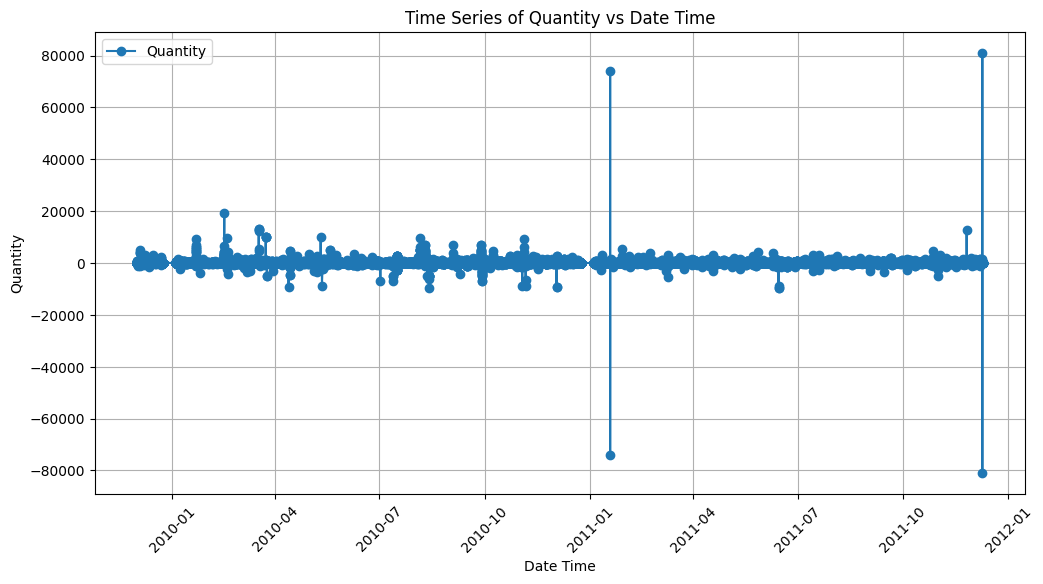

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Concatenar los datasets en un único DataFrame (ajusta esta parte si df_completo ya está definido)
df_completo = pd.concat(dataset2.values(), ignore_index=True)

# Asegurar que la columna 'InvoiceDate' sea de tipo datetime
df_completo['InvoiceDate'] = pd.to_datetime(df_completo['InvoiceDate'])

# Ordenar los datos por fecha para una mejor visualización
df_completo = df_completo.sort_values(by='InvoiceDate')

# Crear el gráfico de serie temporal de Quantity vs InvoiceDate
plt.figure(figsize=(12, 6))
plt.plot(df_completo['InvoiceDate'], df_completo['Quantity'], marker='o', linestyle='-', label='Quantity')

# Configurar el gráfico
plt.xlabel("Date Time")
plt.ylabel("Quantity")
plt.title("Time Series of Quantity vs Date Time")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()


In [51]:
# Número de filas y columnas
filas, columnas = df_completo.shape
print(f"El DataFrame tiene {filas} filas y {columnas} columnas.")

# Número total de datos (celdas)
total_datos = df_completo.size
print(f"El DataFrame contiene un total de {total_datos} datos (celdas).")
data = df_completo

El DataFrame tiene 1067371 filas y 8 columnas.
El DataFrame contiene un total de 8538968 datos (celdas).


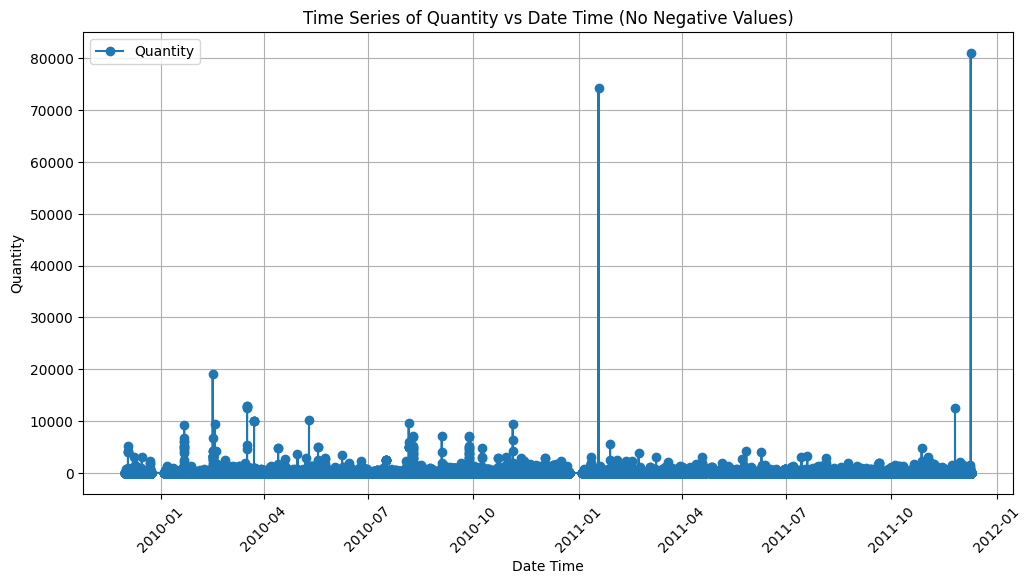

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Concatenar los datasets en un único DataFrame (ajusta esta parte si df_completo ya está definido)
df_completo = pd.concat(dataset2.values(), ignore_index=True)

# Asegurar que la columna 'InvoiceDate' sea de tipo datetime
df_completo['InvoiceDate'] = pd.to_datetime(df_completo['InvoiceDate'])

# Filtrar valores negativos en la columna 'Quantity'
df_completo = df_completo[df_completo['Quantity'] >= 0]

# Ordenar los datos por fecha para una mejor visualización
df_completo = df_completo.sort_values(by='InvoiceDate')

# Crear el gráfico de serie temporal de Quantity vs InvoiceDate sin valores negativos
plt.figure(figsize=(12, 6))
plt.plot(df_completo['InvoiceDate'], df_completo['Quantity'], marker='o', linestyle='-', label='Quantity')

# Configurar el gráfico
plt.xlabel("Date Time")
plt.ylabel("Quantity")
plt.title("Time Series of Quantity vs Date Time (No Negative Values)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()


In [53]:
# Número de filas y columnas
filas, columnas = df_completo.shape
print(f"El DataFrame tiene {filas} filas y {columnas} columnas.")

# Número total de datos (celdas)
total_datos = df_completo.size
print(f"El DataFrame contiene un total de {total_datos} datos (celdas).")
data = df_completo

El DataFrame tiene 1044421 filas y 8 columnas.
El DataFrame contiene un total de 8355368 datos (celdas).


In [54]:
# Contar valores negativos en la columna 'Quantity'
cantidad_negativos = (df_completo['Quantity'] < 0).sum()

print(f"Hay {cantidad_negativos} valores negativos en la columna 'Quantity'.")

Hay 0 valores negativos en la columna 'Quantity'.


In [55]:
import pandas as pd
import numpy as np

# Concatenar los datasets en un único DataFrame
df_completo = pd.concat(dataset2.values(), ignore_index=True)

# Asegurar que la columna 'Quantity' existe en el DataFrame
if 'Quantity' in df_completo.columns:
    # Calcular el rango intercuartil (IQR) para detectar valores atípicos en 'Quantity'
    Q1 = df_completo['Quantity'].quantile(0.25)
    Q3 = df_completo['Quantity'].quantile(0.75)
    IQR = Q3 - Q1

    # Definir los límites para detectar valores atípicos
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identificar los valores atípicos
    outliers = df_completo[(df_completo['Quantity'] < lower_bound) | (df_completo['Quantity'] > upper_bound)]

 


In [56]:
# Número de filas y columnas
filas, columnas = outliers.shape
print(f"El DataFrame tiene {filas} filas y {columnas} columnas.")

# Número total de datos (celdas)
total_datos = outliers.size
print(f"El DataFrame contiene un total de {total_datos} datos (celdas).")
data = outliers

El DataFrame tiene 116489 filas y 8 columnas.
El DataFrame contiene un total de 931912 datos (celdas).


   Invoice StockCode                     Description  Quantity  \
3   489434     22041    RECORD FRAME 7" SINGLE SIZE         48   
4   489434     21232  STRAWBERRY CERAMIC TRINKET BOX        24   
5   489434     22064      PINK DOUGHNUT TRINKET POT         24   
6   489434     21871             SAVE THE PLANET MUG        24   
10  489435     22195    HEART MEASURING SPOONS LARGE        24   

           InvoiceDate  Price  Customer ID         Country  
3  2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4  2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
5  2009-12-01 07:45:00   1.65      13085.0  United Kingdom  
6  2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
10 2009-12-01 07:46:00   1.65      13085.0  United Kingdom  
Valores atípicos guardados en 'outliers_quantity.csv'.


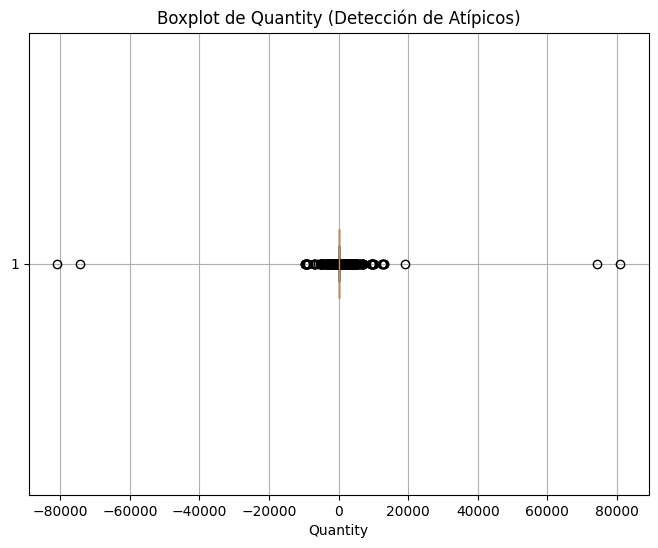

In [57]:
print(outliers.head())
outliers.to_csv("outliers_quantity.csv", index=False)
print("Valores atípicos guardados en 'outliers_quantity.csv'.")
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(df_completo['Quantity'], vert=False, patch_artist=True)
plt.title("Boxplot de Quantity (Detección de Atípicos)")
plt.xlabel("Quantity")
plt.grid(True)
plt.show()


In [58]:
pip install ace_tools


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
pip search ace_tools

Note: you may need to restart the kernel to use updated packages.


ERROR: XMLRPC request failed [code: -32500]
RuntimeError: PyPI no longer supports 'pip search' (or XML-RPC search). Please use https://pypi.org/search (via a browser) instead. See https://warehouse.pypa.io/api-reference/xml-rpc.html#deprecated-methods for more information.


In [60]:
pip install git+https://github.com/usuario/ace_tools.git

  Cloning https://github.com/usuario/ace_tools.git to c:\users\wmanj\appdata\local\temp\pip-req-build-x4rnwd9o
Note: you may need to restart the kernel to use updated packages.


  ERROR: Error [WinError 2] El sistema no puede encontrar el archivo especificado while executing command git version

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?


In [61]:
import pandas as pd
import numpy as np

# Calcular el rango intercuartil (IQR) para detectar valores atípicos en 'Quantity'
Q1 = df_completo['Quantity'].quantile(0.25)
Q3 = df_completo['Quantity'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para detectar valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar los valores atípicos
outliers = df_completo[(df_completo['Quantity'] < lower_bound) | (df_completo['Quantity'] > upper_bound)]

# Filtrar los outliers que son menores a 60,000 o mayores a 60,000
filtered_outliers = outliers[(outliers['Quantity'] > 20000)]
filtered_outliers1 = outliers[(outliers['Quantity'] < -20000)]
print(filtered_outliers)
print(filtered_outliers1)


        Invoice StockCode                     Description  Quantity  \
587080   541431     23166  MEDIUM CERAMIC TOP STORAGE JAR     74215   
1065882  581483     23843     PAPER CRAFT , LITTLE BIRDIE     80995   

                InvoiceDate  Price  Customer ID         Country  
587080  2011-01-18 10:01:00   1.04      12346.0  United Kingdom  
1065882 2011-12-09 09:15:00   2.08      16446.0  United Kingdom  
         Invoice StockCode                     Description  Quantity  \
587085   C541433     23166  MEDIUM CERAMIC TOP STORAGE JAR    -74215   
1065883  C581484     23843     PAPER CRAFT , LITTLE BIRDIE    -80995   

                InvoiceDate  Price  Customer ID         Country  
587085  2011-01-18 10:17:00   1.04      12346.0  United Kingdom  
1065883 2011-12-09 09:27:00   2.08      16446.0  United Kingdom  


In [62]:
# Filtrar para eliminar valores mayores a 20000 y valores negativos
df_filtrado = df_completo[(df_completo['Quantity'] <= 20000) & (df_completo['Quantity'] >= 0)]

# Verificar el resultado
print(f"Filas originales: {df_completo.shape[0]}")
print(f"Filas después de filtrar: {df_filtrado.shape[0]}")
df_sinoutliers= df_filtrado 
# Para ver las columnas de df_sinoutliers
print(df_sinoutliers.columns)
# Asegúrate de que 'DATE_TIME' esté en formato datetime
df_sinoutliers['DATE_TIME'] = pd.to_datetime(df_sinoutliers['InvoiceDate'])
# Asegúrate de que 'DATE_TIME' es una columna de tipo datetime
df_sinoutliers['DATE_TIME'] = pd.to_datetime(df_sinoutliers['DATE_TIME'], errors='coerce')




Filas originales: 1067371
Filas después de filtrar: 1044419
Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')


C:\Users\wmanj\AppData\Local\Temp\ipykernel_15920\597764707.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sinoutliers['DATE_TIME'] = pd.to_datetime(df_sinoutliers['InvoiceDate'])
C:\Users\wmanj\AppData\Local\Temp\ipykernel_15920\597764707.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sinoutliers['DATE_TIME'] = pd.to_datetime(df_sinoutliers['DATE_TIME'], errors='coerce')


In [63]:
import pandas as pd

# Asegúrate de que la columna 'DATE_TIME' sea del tipo datetime
df_sinoutliers['DATE_TIME'] = pd.to_datetime(df_sinoutliers['DATE_TIME'], errors='coerce')

# Verificar si la conversión fue exitosa
print(df_sinoutliers['DATE_TIME'].head())  # Mostrar las primeras filas de la columna 'DATE_TIME'

# Verificar si hay valores nulos después de la conversión
print(f'Cantidad de valores nulos en DATE_TIME: {df_sinoutliers["DATE_TIME"].isna().sum()}')

# Si es necesario, establecer 'DATE_TIME' como índice (si se va a usar como tal)
df_sinoutliers.set_index('DATE_TIME', inplace=True)

# Ahora la columna 'DATE_TIME' está convertida correctamente a tipo datetime y como índice
print(df_sinoutliers.index)  # Verificar que el índice es de tipo DatetimeIndex


0   2009-12-01 07:45:00
1   2009-12-01 07:45:00
2   2009-12-01 07:45:00
3   2009-12-01 07:45:00
4   2009-12-01 07:45:00
Name: DATE_TIME, dtype: datetime64[ns]
Cantidad de valores nulos en DATE_TIME: 0
DatetimeIndex(['2009-12-01 07:45:00', '2009-12-01 07:45:00',
               '2009-12-01 07:45:00', '2009-12-01 07:45:00',
               '2009-12-01 07:45:00', '2009-12-01 07:45:00',
               '2009-12-01 07:45:00', '2009-12-01 07:45:00',
               '2009-12-01 07:46:00', '2009-12-01 07:46:00',
               ...
               '2011-12-09 12:50:00', '2011-12-09 12:50:00',
               '2011-12-09 12:50:00', '2011-12-09 12:50:00',
               '2011-12-09 12:50:00', '2011-12-09 12:50:00',
               '2011-12-09 12:50:00', '2011-12-09 12:50:00',
               '2011-12-09 12:50:00', '2011-12-09 12:50:00'],
              dtype='datetime64[ns]', name='DATE_TIME', length=1044419, freq=None)


C:\Users\wmanj\AppData\Local\Temp\ipykernel_15920\1413853191.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sinoutliers['DATE_TIME'] = pd.to_datetime(df_sinoutliers['DATE_TIME'], errors='coerce')


In [64]:
# Si 'DATE_TIME' es el índice, reseteamos el índice para convertirlo en una columna normal
df_sinoutliers.reset_index(inplace=True)

# Ahora 'DATE_TIME' es una columna normal, y puedes acceder a ella sin problemas
df_sinoutliers['DATE_TIME'] = pd.to_datetime(df_sinoutliers['DATE_TIME'], errors='coerce')

# Verificar si 'DATE_TIME' ahora está correctamente convertida
print(df_sinoutliers['DATE_TIME'].head())


0   2009-12-01 07:45:00
1   2009-12-01 07:45:00
2   2009-12-01 07:45:00
3   2009-12-01 07:45:00
4   2009-12-01 07:45:00
Name: DATE_TIME, dtype: datetime64[ns]


C:\Users\wmanj\AppData\Local\Temp\ipykernel_15920\3119272185.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sinoutliers['DATE_TIME'] = pd.to_datetime(df_sinoutliers['DATE_TIME'], errors='coerce')


In [65]:
# Si ya tienes el índice como 'DATE_TIME', no es necesario convertirlo a columna
df_sinoutliers.set_index('DATE_TIME', inplace=True)

# Verificar el tipo de índice (debe ser DatetimeIndex)
print(type(df_sinoutliers.index))  # Esto debe imprimir: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>


<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


MODELOS

suavización exponencial de primer orden 

C:\Users\wmanj\AppData\Local\Temp\ipykernel_15920\3472356442.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sinoutliers['InvoiceDate'] = pd.to_datetime(df_sinoutliers['InvoiceDate'])


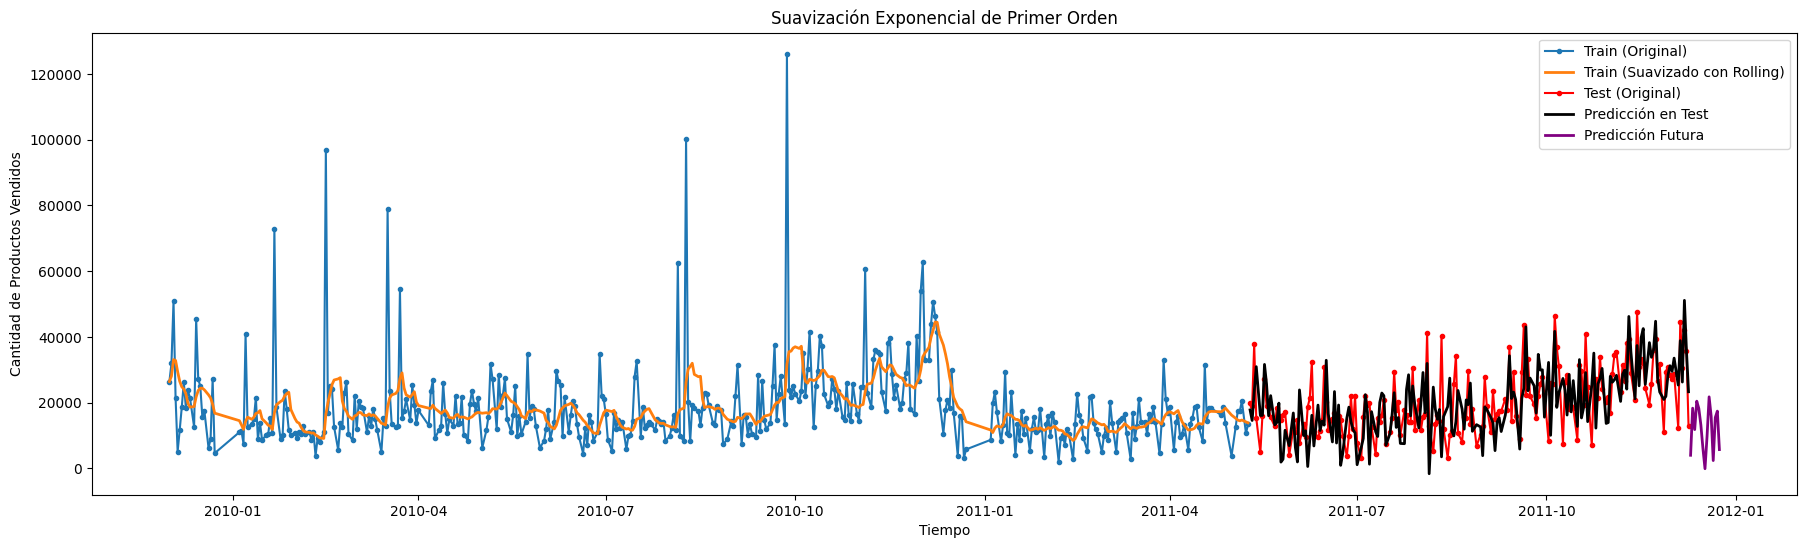

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Convertir 'InvoiceDate' en columna si está en el índice
if isinstance(df_sinoutliers.index, pd.DatetimeIndex):
    df_sinoutliers.reset_index(inplace=True)

# Asegurar que 'InvoiceDate' sea de tipo datetime
df_sinoutliers['InvoiceDate'] = pd.to_datetime(df_sinoutliers['InvoiceDate'])

# Agrupar por día y sumar la cantidad de productos vendidos
data_daily = df_sinoutliers.groupby(df_sinoutliers['InvoiceDate'].dt.date)['Quantity'].sum().reset_index()
data_daily['InvoiceDate'] = pd.to_datetime(data_daily['InvoiceDate'])
data_daily.set_index('InvoiceDate', inplace=True)

# Aplicar rolling mean para suavizar la serie antes de modelar
data_daily['Quantity_rolling'] = data_daily['Quantity'].rolling(window=7, min_periods=1).mean()

# División en train y test (70% - 30%)
split_index = int(len(data_daily) * 0.7)
train, test = data_daily[:split_index], data_daily[split_index:]

# Calcular la desviación estándar en una ventana móvil para preservar variabilidad
rolling_std_train = train['Quantity'].rolling(window=8, min_periods=1).std()
rolling_std_test = test['Quantity'].rolling(window=8, min_periods=1).std()

# Parámetro de suavización
lambda_ = 0.6

# Suavización exponencial de primer orden
y1 = train['Quantity_rolling'].copy()
y1.iloc[0] = train['Quantity_rolling'].iloc[0]

for t in range(1, len(train)):
    y1.iloc[t] = lambda_ * train['Quantity_rolling'].iloc[t] + (1 - lambda_) * y1.iloc[t-1]

# Predicción en train
train_predictions = y1.copy()

# Predicciones en test usando última observación suavizada
y1_test = test['Quantity_rolling'].copy()
y1_test.iloc[0] = y1.iloc[-1]

for t in range(1, len(test)):
    y1_test.iloc[t] = lambda_ * test['Quantity_rolling'].iloc[t] + (1 - lambda_) * y1_test.iloc[t-1]

test_predictions = y1_test.copy()

# Añadir variabilidad basada en la desviación estándar de test
np.random.seed(42)
noise_test = np.random.normal(loc=0, scale=rolling_std_test.mean(), size=len(test_predictions))
test_predictions += noise_test

# Predicción a futuro con 15 días
num_days_forecast = 15
future_dates = pd.date_range(start=test.index[-1], periods=num_days_forecast + 1, freq='D')[1:]
future_forecast = np.zeros(num_days_forecast)

# Continuar con la última observación suavizada
y1_future = y1.iloc[-1]
for t in range(num_days_forecast):
    y1_future = lambda_ * y1_future + (1 - lambda_) * y1_future
    future_forecast[t] = y1_future

# Añadir variabilidad basada en la desviación estándar de train
noise_future = np.random.normal(loc=0, scale=rolling_std_train.mean(), size=len(future_forecast))
future_forecast += noise_future

# 📊 Graficar los resultados con predicción en test mejorada y predicción futura sin cambios
plt.figure(figsize=(22, 6))
plt.plot(train.index, train['Quantity'], marker='o', linestyle='-', markersize=3, label='Train (Original)')
plt.plot(train.index, train_predictions, linestyle='-', linewidth=2, label='Train (Suavizado con Rolling)')
plt.plot(test.index, test['Quantity'], marker='o', linestyle='-', markersize=3, label='Test (Original)', color='red')
plt.plot(test.index, test_predictions, linestyle='-', linewidth=2, label='Predicción en Test', color='black')
plt.plot(future_dates, future_forecast, linestyle='-', linewidth=2, color='purple', label='Predicción Futura')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de Productos Vendidos')
plt.title('Suavización Exponencial de Primer Orden')
plt.legend()
plt.show()

In [86]:
pip install --upgrade arch


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


c:\Users\wmanj\miniconda3\envs\ml_venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


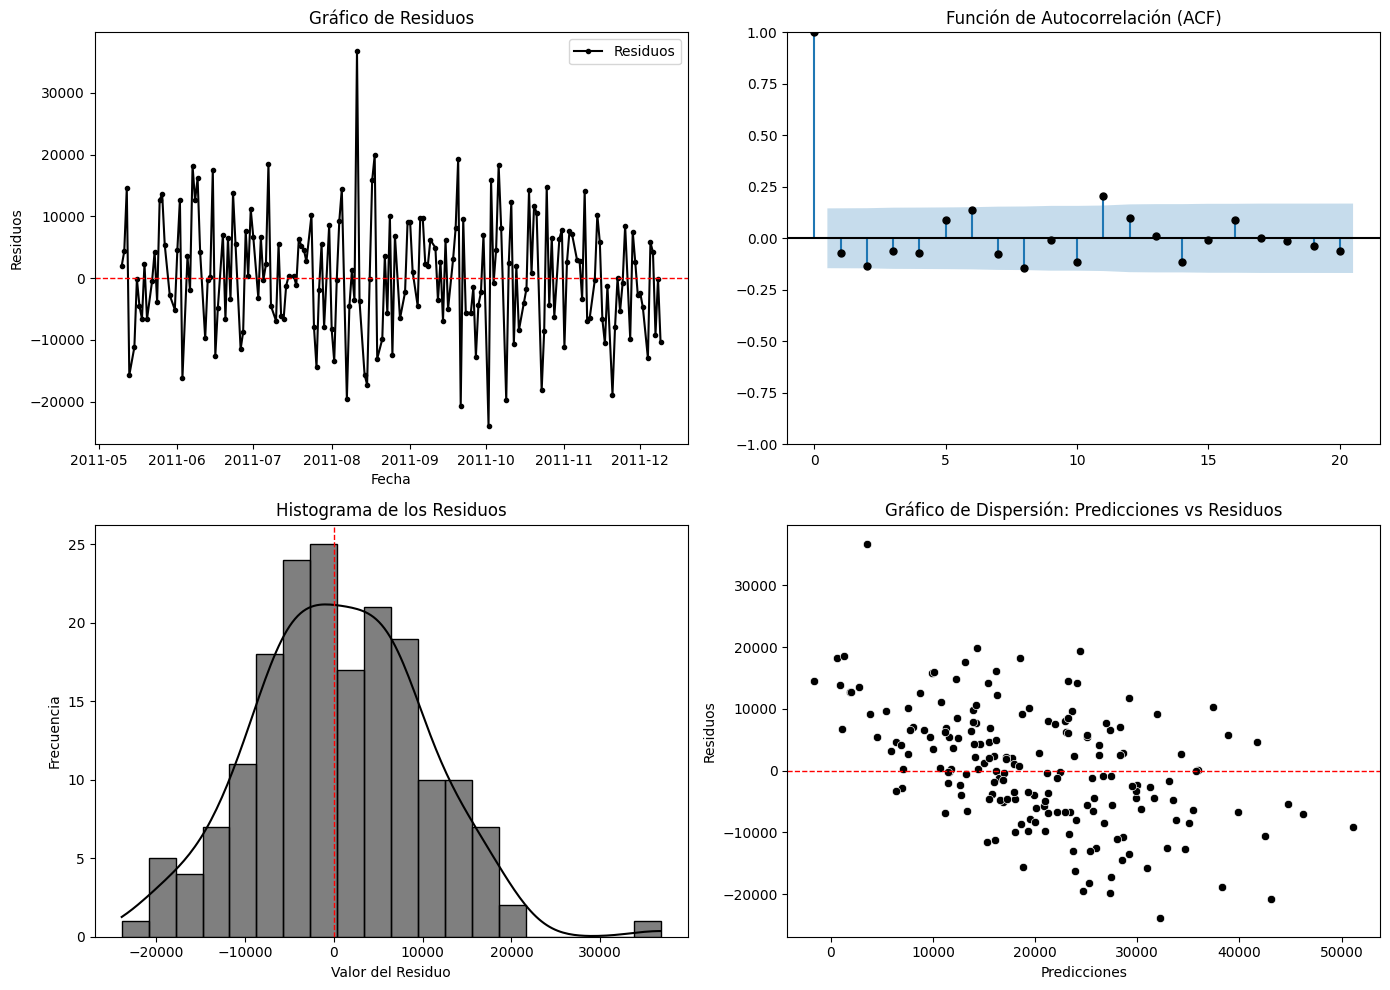

Prueba de Ljung-Box (resultados):
   lb_stat  lb_pvalue
1  0.98169   0.321782
1    0.321782
Name: lb_pvalue, dtype: float64

Métricas:
MAE: 7549.274194431264
MSE: 89593986.5796343
RMSE: 9465.410005891677
MAPE: 50.484031581428425


In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calcular residuos
residuos = test['Quantity'] - test_predictions

# Crear figura con 2x2 subgráficos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1️ Gráfico de los residuos
test.index = pd.to_datetime(test.index)  # Asegurar que test.index sea datetime
axes[0, 0].plot(test.index, residuos, marker='o', linestyle='-', markersize=3, color='black', label='Residuos')
axes[0, 0].axhline(y=0, color='red', linestyle='--', linewidth=1)
axes[0, 0].set_title("Gráfico de Residuos")
axes[0, 0].set_xlabel("Fecha")
axes[0, 0].set_ylabel("Residuos")
axes[0, 0].legend()

# 2️ Función de Autocorrelación (ACF)
plot_acf(residuos.dropna(), lags=20, ax=axes[0, 1], color='black')
axes[0, 1].set_title("Función de Autocorrelación (ACF)")

# 3️ Histograma de los residuos
sns.histplot(residuos, kde=True, bins=20, color='black', ax=axes[1, 0])
axes[1, 0].axvline(x=0, color='red', linestyle='--', linewidth=1)
axes[1, 0].set_title("Histograma de los Residuos")
axes[1, 0].set_xlabel("Valor del Residuo")
axes[1, 0].set_ylabel("Frecuencia")

# 4️ Gráfico de dispersión con ggplot
sns.scatterplot(x=test_predictions, y=residuos, color='black', ax=axes[1, 1])
axes[1, 1].axhline(y=0, color='red', linestyle='--', linewidth=1)
axes[1, 1].set_title("Gráfico de Dispersión: Predicciones vs Residuos")
axes[1, 1].set_xlabel("Predicciones")
axes[1, 1].set_ylabel("Residuos")

plt.tight_layout()
plt.show()

# 5️ Análisis completo de autocorrelación y métricas de error
ljung_box_result = acorr_ljungbox(residuos, lags=1)

# Obtener el valor p de la prueba Ljung-Box
ljung_box_p_value = ljung_box_result['lb_pvalue']

# Cálculo de métricas de error
mae = mean_absolute_error(test['Quantity'], test_predictions)
mse = mean_squared_error(test['Quantity'], test_predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test['Quantity'] - test_predictions) / test['Quantity'])) * 100

# Mostrar resultados
print("Prueba de Ljung-Box (resultados):")
print(ljung_box_result)

# Mostrar el valor p de la prueba Ljung-Box
print(ljung_box_p_value)
print(f'\nMétricas:')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')


In [93]:
pip install arch


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [106]:
from statsmodels.tsa.stattools import bds

# Asumiendo que 'residuos' es tu serie temporal de residuos (ya calculados previamente)
bds_statistic, bds_p_value = bds(residuos)

# Imprimir el estadístico del test y el valor p
print("Estadístico del test BDS:", bds_statistic)
print("Vbds_p_value BDS:", bds_p_value)


import numpy as np
import pandas as pd
from statsmodels.tools.eval_measures import rmse

# Asumimos que tienes las predicciones de tu modelo en `test_predictions` y los valores reales en `test['Quantity']`

# 1. Calcula los errores de los dos modelos
error_model = test['Quantity'] - test_predictions

# Usamos el modelo de referencia, en este caso, predicción de la media de la serie temporal
error_benchmark = test['Quantity'] - test['Quantity'].mean()

# 2. Calcula la diferencia entre los errores al cuadrado
# La fórmula de Diebold-Mariano utiliza las diferencias al cuadrado de los errores
d = (error_model ** 2) - (error_benchmark ** 2)

# 3. Calcular la estadística del test de Diebold-Mariano
# La estadística de Diebold-Mariano sigue una distribución normal asintótica bajo la hipótesis nula
dm_statistic = np.mean(d) / (np.std(d) / np.sqrt(len(d)))

# 4. Calcular el valor p (para pruebas de dos colas)
from scipy.stats import norm

# p-valor para una prueba de dos colas
dm_p_value = 2 * (1 - norm.cdf(np.abs(dm_statistic)))

# Imprimir los resultados del test Diebold-Mariano
print("Estadístico del test Diebold-Mariano:", dm_statistic)
print("Valor p del test Diebold-Mariano:", dm_p_value)


Estadístico del test BDS: 0.0
Vbds_p_value BDS: 1.0
Estadístico del test Diebold-Mariano: -0.463662778128742
Valor p del test Diebold-Mariano: 0.6428893689431026


Suavización exponencial de segundo orden

C:\Users\wmanj\AppData\Local\Temp\ipykernel_15920\1442620567.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sinoutliers['InvoiceDate'] = pd.to_datetime(df_sinoutliers['InvoiceDate'])


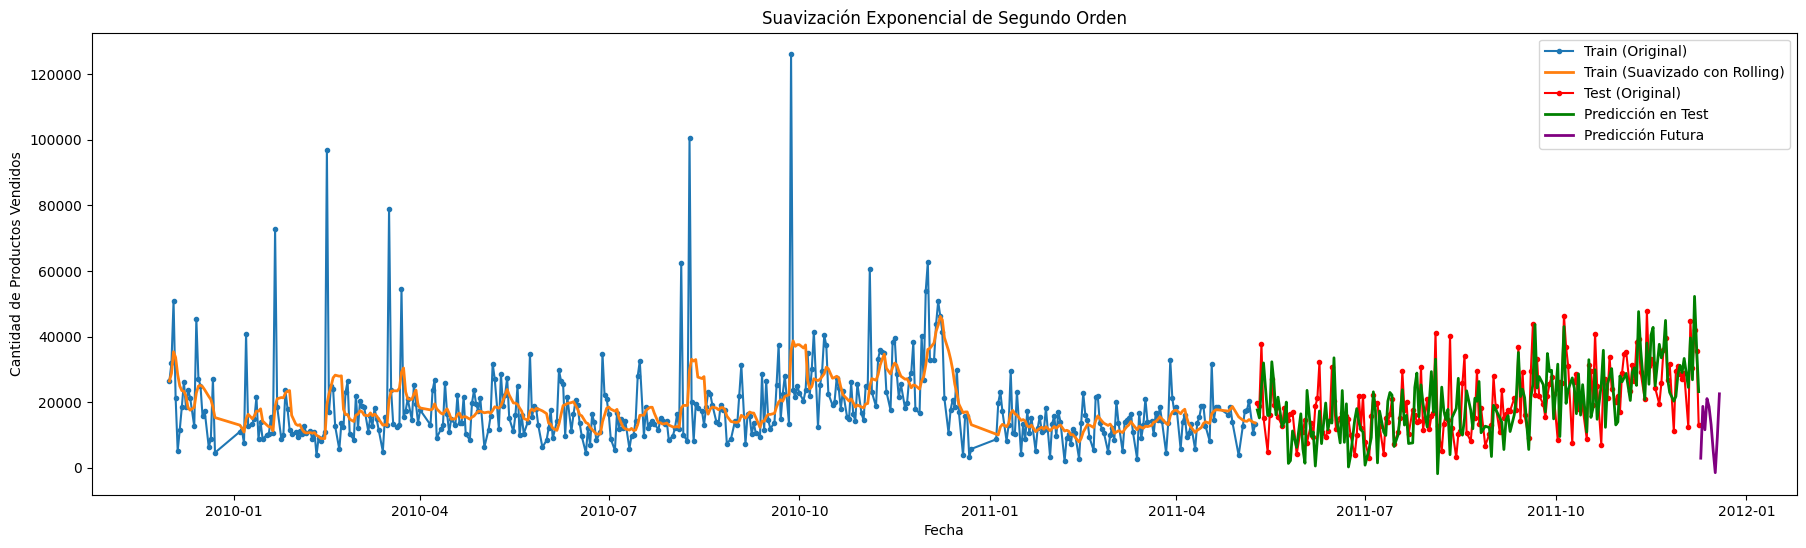

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Convertir 'InvoiceDate' en columna si está en el índice
if isinstance(df_sinoutliers.index, pd.DatetimeIndex):
    df_sinoutliers.reset_index(inplace=True)

# Asegurar que 'InvoiceDate' sea de tipo datetime
df_sinoutliers['InvoiceDate'] = pd.to_datetime(df_sinoutliers['InvoiceDate'])

# Agrupar por día y sumar la cantidad de productos vendidos
data_daily = df_sinoutliers.groupby(df_sinoutliers['InvoiceDate'].dt.date)['Quantity'].sum().reset_index()
data_daily['InvoiceDate'] = pd.to_datetime(data_daily['InvoiceDate'])
data_daily.set_index('InvoiceDate', inplace=True)

# Aplicar rolling mean para suavizar la serie antes de modelar
data_daily['Quantity_rolling'] = data_daily['Quantity'].rolling(window=7, min_periods=1).mean()

# División en train y test (70% - 30%)
split_index = int(len(data_daily) * 0.7)
train, test = data_daily[:split_index], data_daily[split_index:]

# Calcular la desviación estándar en una ventana móvil para preservar variabilidad
rolling_std_train = train['Quantity'].rolling(window=14, min_periods=1).std()
rolling_std_test = test['Quantity'].rolling(window=14, min_periods=1).std()

# Parámetro de suavización
lambda_ = 0.6

# Suavización exponencial de segundo orden
y1 = train['Quantity_rolling'].copy()
y2 = train['Quantity_rolling'].copy()
y1.iloc[0] = train['Quantity_rolling'].iloc[0]
y2.iloc[0] = train['Quantity_rolling'].iloc[0]

for t in range(1, len(train)):
    y1.iloc[t] = lambda_ * train['Quantity_rolling'].iloc[t] + (1 - lambda_) * y1.iloc[t-1]
    y2.iloc[t] = lambda_ * y1.iloc[t] + (1 - lambda_) * y2.iloc[t-1]

# Predicción en train
train_predictions = 2 * y1 - y2

# Predicciones en test usando última tendencia estimada
y1_test = test['Quantity_rolling'].copy()
y2_test = test['Quantity_rolling'].copy()
y1_test.iloc[0] = y1.iloc[-1]
y2_test.iloc[0] = y2.iloc[-1]

for t in range(1, len(test)):
    y1_test.iloc[t] = lambda_ * test['Quantity_rolling'].iloc[t] + (1 - lambda_) * y1_test.iloc[t-1]
    y2_test.iloc[t] = lambda_ * y1_test.iloc[t] + (1 - lambda_) * y2_test.iloc[t-1]

test_predictions = 2 * y1_test - y2_test

# Añadir variabilidad basada en la desviación estándar de test
np.random.seed(42)
noise_test = np.random.normal(loc=0, scale=rolling_std_test.mean(), size=len(test_predictions))
test_predictions += noise_test

# Predicción a futuro con 10 días
num_days_forecast = 10
future_dates = pd.date_range(start=test.index[-1], periods=num_days_forecast + 1, freq='D')[1:]
future_forecast = np.zeros(num_days_forecast)

# Continuar con la última tendencia
y1_future, y2_future = y1.iloc[-1], y2.iloc[-1]
for t in range(num_days_forecast):
    y1_future = lambda_ * y1_future + (1 - lambda_) * y1_future
    y2_future = lambda_ * y1_future + (1 - lambda_) * y2_future
    future_forecast[t] = 2 * y1_future - y2_future

# Añadir variabilidad basada en la desviación estándar de train
noise_future = np.random.normal(loc=0, scale=rolling_std_train.mean(), size=len(future_forecast))
future_forecast += noise_future

# 📊 Graficar los resultados con predicción en test mejorada y predicción futura sin cambios
plt.figure(figsize=(22, 6))
plt.plot(train.index, train['Quantity'], marker='o', linestyle='-', markersize=3, label='Train (Original)')
plt.plot(train.index, train_predictions, linestyle='-', linewidth=2, label='Train (Suavizado con Rolling)')
plt.plot(test.index, test['Quantity'], marker='o', linestyle='-', markersize=3, label='Test (Original)', color='red')
plt.plot(test.index, test_predictions, linestyle='-', linewidth=2, label='Predicción en Test', color='green')
plt.plot(future_dates, future_forecast, linestyle='-', linewidth=2, color='purple', label='Predicción Futura')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Productos Vendidos')
plt.title('Suavización Exponencial de Segundo Orden')
plt.legend()
plt.show()


c:\Users\wmanj\miniconda3\envs\ml_venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


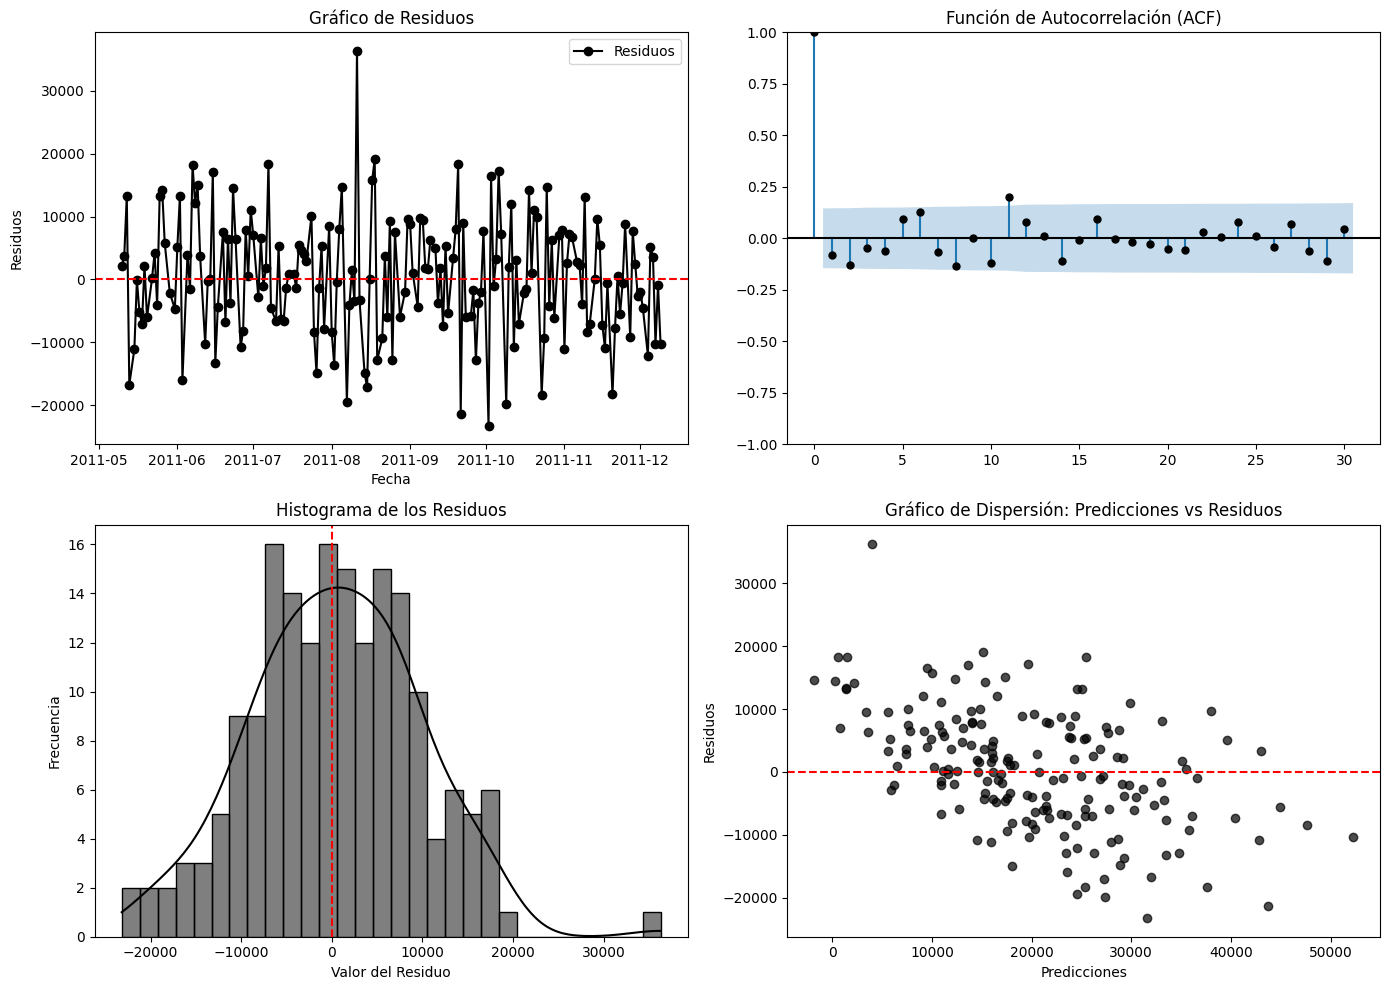

No existe evidencia de autocorrelación en residuos (p = 0.0717)

Métricas:
MAE: 7454.330796403234
MSE: 87629327.27844186
RMSE: 9361.05374829361
MAPE: 49.71120257264096


In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calcular los residuos del modelo de suavización exponencial de segundo orden
residuos_segundo_orden = test['Quantity'] - test_predictions

# Configurar el tamaño del gráfico con 4 subgráficos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

#  1. Gráfico de Residuos
axes[0, 0].plot(test.index, residuos_segundo_orden, marker='o', linestyle='-', color='black', label="Residuos")
axes[0, 0].axhline(y=0, color='red', linestyle='dashed', linewidth=1.5)
axes[0, 0].set_title("Gráfico de Residuos")
axes[0, 0].set_xlabel("Fecha")
axes[0, 0].set_ylabel("Residuos")
axes[0, 0].legend()

#  2. Función de Autocorrelación (ACF)
plot_acf(residuos_segundo_orden.dropna(), lags=30, ax=axes[0, 1],color='black')
axes[0, 1].set_title("Función de Autocorrelación (ACF)")

# 3. Histograma de los Residuos con KDE
sns.histplot(residuos_segundo_orden, bins=30, kde=True, ax=axes[1, 0], color='black')
axes[1, 0].axvline(x=0, color='red', linestyle='dashed', linewidth=1.5)
axes[1, 0].set_title("Histograma de los Residuos")
axes[1, 0].set_xlabel("Valor del Residuo")
axes[1, 0].set_ylabel("Frecuencia")

# 4. Gráfico de Dispersión: Predicciones vs Residuos
axes[1, 1].scatter(test_predictions, residuos_segundo_orden, color='black', alpha=0.7)
axes[1, 1].axhline(y=0, color='red', linestyle='dashed', linewidth=1.5)
axes[1, 1].set_title("Gráfico de Dispersión: Predicciones vs Residuos")
axes[1, 1].set_xlabel("Predicciones")
axes[1, 1].set_ylabel("Residuos")

# Ajustar diseño y mostrar
plt.tight_layout()
plt.show()

#  Prueba de Ljung-Box
ljung_box_result = acorr_ljungbox(residuos_segundo_orden.dropna(), lags=[10], return_df=True)
ljung_box_pvalor = ljung_box_result["lb_pvalue"].values[0]

# Interpretación de la prueba de Ljung-Box
if ljung_box_pvalor < 0.05:
    print(f"existe evidencia de autocorrelacion en residuos(p = {ljung_box_pvalor:.4f})")
else:
    print(f"No existe evidencia de autocorrelación en residuos (p = {ljung_box_pvalor:.4f})")

#  Cálculo de las métricas de error
mae = mean_absolute_error(test['Quantity'], test_predictions)
mse = mean_squared_error(test['Quantity'], test_predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test['Quantity'] - test_predictions) / test['Quantity'])) * 100

# Mostrar las métricas de error
print(f'\nMétricas:')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')


In [110]:
from statsmodels.tsa.stattools import bds

# Asumiendo que 'residuos' es tu serie temporal de residuos (ya calculados previamente)
bds_statistic, bds_p_value = bds(residuos_segundo_orden)

# Imprimir el estadístico del test y el valor p
print("Estadístico del test BDS:", bds_statistic)
print("Vbds_p_value BDS:", bds_p_value)


import numpy as np
import pandas as pd
from statsmodels.tools.eval_measures import rmse

# Asumimos que tienes las predicciones de tu modelo en `test_predictions` y los valores reales en `test['Quantity']`

# 1. Calcula los errores de los dos modelos
error_model = test['Quantity'] - test_predictions

# Usamos el modelo de referencia, en este caso, predicción de la media de la serie temporal
error_benchmark = test['Quantity'] - test['Quantity'].mean()

# 2. Calcula la diferencia entre los errores al cuadrado
# La fórmula de Diebold-Mariano utiliza las diferencias al cuadrado de los errores
d = (error_model ** 2) - (error_benchmark ** 2)

# 3. Calcular la estadística del test de Diebold-Mariano
# La estadística de Diebold-Mariano sigue una distribución normal asintótica bajo la hipótesis nula
dm_statistic = np.mean(d) / (np.std(d) / np.sqrt(len(d)))

# 4. Calcular el valor p (para pruebas de dos colas)
from scipy.stats import norm

# p-valor para una prueba de dos colas
dm_p_value = 2 * (1 - norm.cdf(np.abs(dm_statistic)))

# Imprimir los resultados del test Diebold-Mariano
print("Estadístico del test Diebold-Mariano:", dm_statistic)
print("Valor p del test Diebold-Mariano:", dm_p_value)


Estadístico del test BDS: 2.0511559449574825
Vbds_p_value BDS: 0.04025176260775222
Estadístico del test Diebold-Mariano: -0.602845548947347
Valor p del test Diebold-Mariano: 0.5466114422007278


Suavización exponencial de Holt-wintersADITIVO


C:\Users\wmanj\AppData\Local\Temp\ipykernel_15920\3896918131.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sinoutliers['InvoiceDate'] = pd.to_datetime(df_sinoutliers['InvoiceDate'])
c:\Users\wmanj\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\wmanj\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\wmanj\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning:

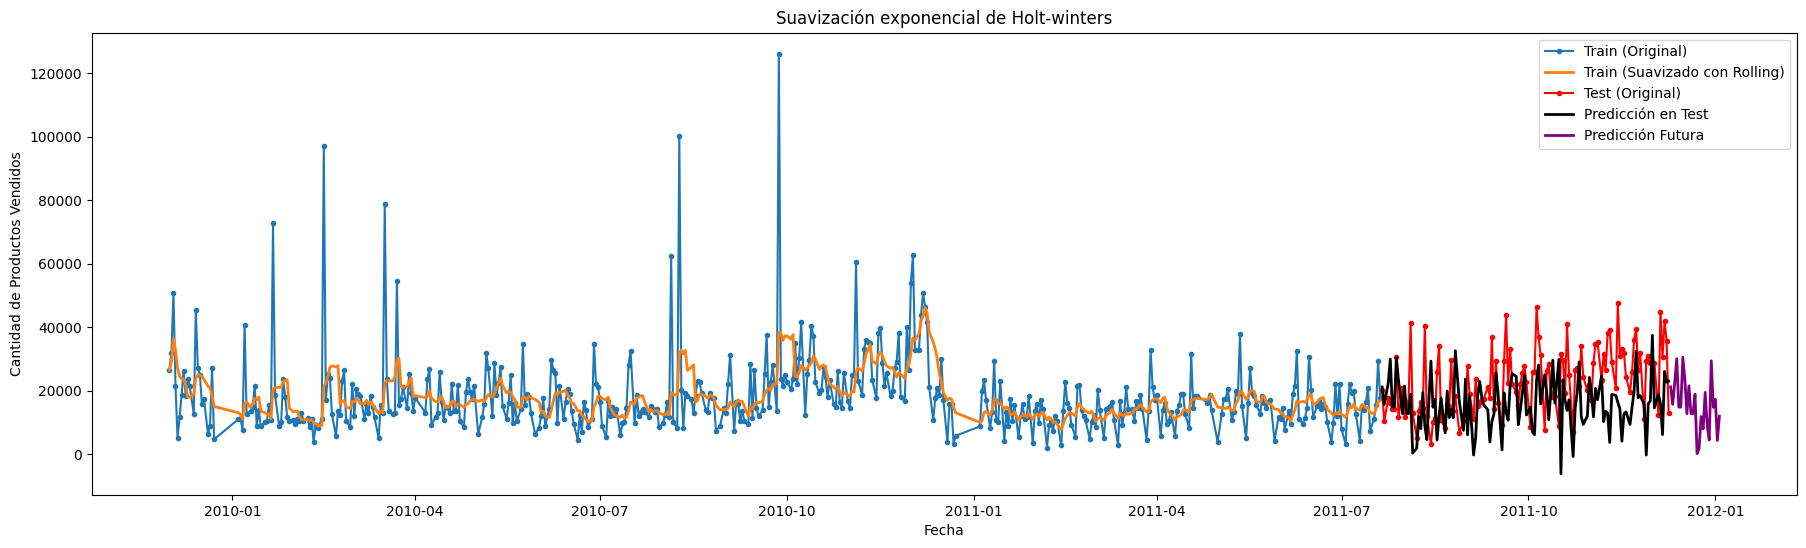

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Convertir 'InvoiceDate' en columna si está en el índice
if isinstance(df_sinoutliers.index, pd.DatetimeIndex):
    df_sinoutliers.reset_index(inplace=True)

# Asegurar que 'InvoiceDate' sea de tipo datetime
df_sinoutliers['InvoiceDate'] = pd.to_datetime(df_sinoutliers['InvoiceDate'])

# Agrupar por día y sumar la cantidad de productos vendidos
data_daily = df_sinoutliers.groupby(df_sinoutliers['InvoiceDate'].dt.date)['Quantity'].sum().reset_index()
data_daily['InvoiceDate'] = pd.to_datetime(data_daily['InvoiceDate'])
data_daily.set_index('InvoiceDate', inplace=True)

# Aplicar rolling mean para suavizar la serie antes de modelar
data_daily['Quantity_rolling'] = data_daily['Quantity'].rolling(window=7, min_periods=1).mean()

# División en train y test (70% - 30%)
split_index = int(len(data_daily) * 0.8)
train, test = data_daily[:split_index], data_daily[split_index:]

# Calcular la desviación estándar en una ventana móvil para preservar variabilidad
rolling_std_train = train['Quantity'].rolling(window=7, min_periods=1).std()
rolling_std_test = test['Quantity'].rolling(window=7, min_periods=1).std()

# Modelo Holt-Winters con tendencia amortiguada sobre la serie suavizada
holt_winters_model_damped = ExponentialSmoothing(
    train['Quantity_rolling'], trend="add", damped_trend=True, seasonal=None, initialization_method="estimated"
).fit()

# Predicciones en test con variabilidad
test_predictions_damped = holt_winters_model_damped.forecast(len(test))

# Añadir variabilidad basada en la desviación estándar de test
np.random.seed(42)  # Para reproducibilidad
noise_test = np.random.normal(loc=0, scale=rolling_std_test.mean(), size=len(test_predictions_damped))
test_predictions_damped += noise_test

# Predicción a futuro con 25 días
num_days_forecast = 25
future_dates = pd.date_range(start=test.index[-1], periods=num_days_forecast + 1, freq='D')[1:]
future_forecast_damped = holt_winters_model_damped.forecast(num_days_forecast)

# Añadir variabilidad basada en la desviación estándar de train
np.random.seed(42)  # Para reproducibilidad
noise_future = np.random.normal(loc=0, scale=rolling_std_train.mean(), size=len(future_forecast_damped))
future_forecast_damped += noise_future

#  Graficar los resultados con predicción en test mejorada y predicción futura sin cambios
plt.figure(figsize=(22, 6))
plt.plot(train.index, train['Quantity'], marker='o', linestyle='-', markersize=3, label='Train (Original)')
plt.plot(train.index, train['Quantity_rolling'], linestyle='-', linewidth=2, label='Train (Suavizado con Rolling)')
plt.plot(test.index, test['Quantity'], marker='o', linestyle='-', markersize=3, label='Test (Original)', color='red')
plt.plot(test.index, test_predictions_damped, linestyle='-', linewidth=2, label='Predicción en Test', color='black')
plt.plot(future_dates, future_forecast_damped, linestyle='-', linewidth=2, color='purple', label='Predicción Futura')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Productos Vendidos')
plt.title('Suavización exponencial de Holt-winters')
plt.legend()
plt.show()

Dimensión de test.index: 121
Dimensión de residuos_holt_winters: 121


c:\Users\wmanj\miniconda3\envs\ml_venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


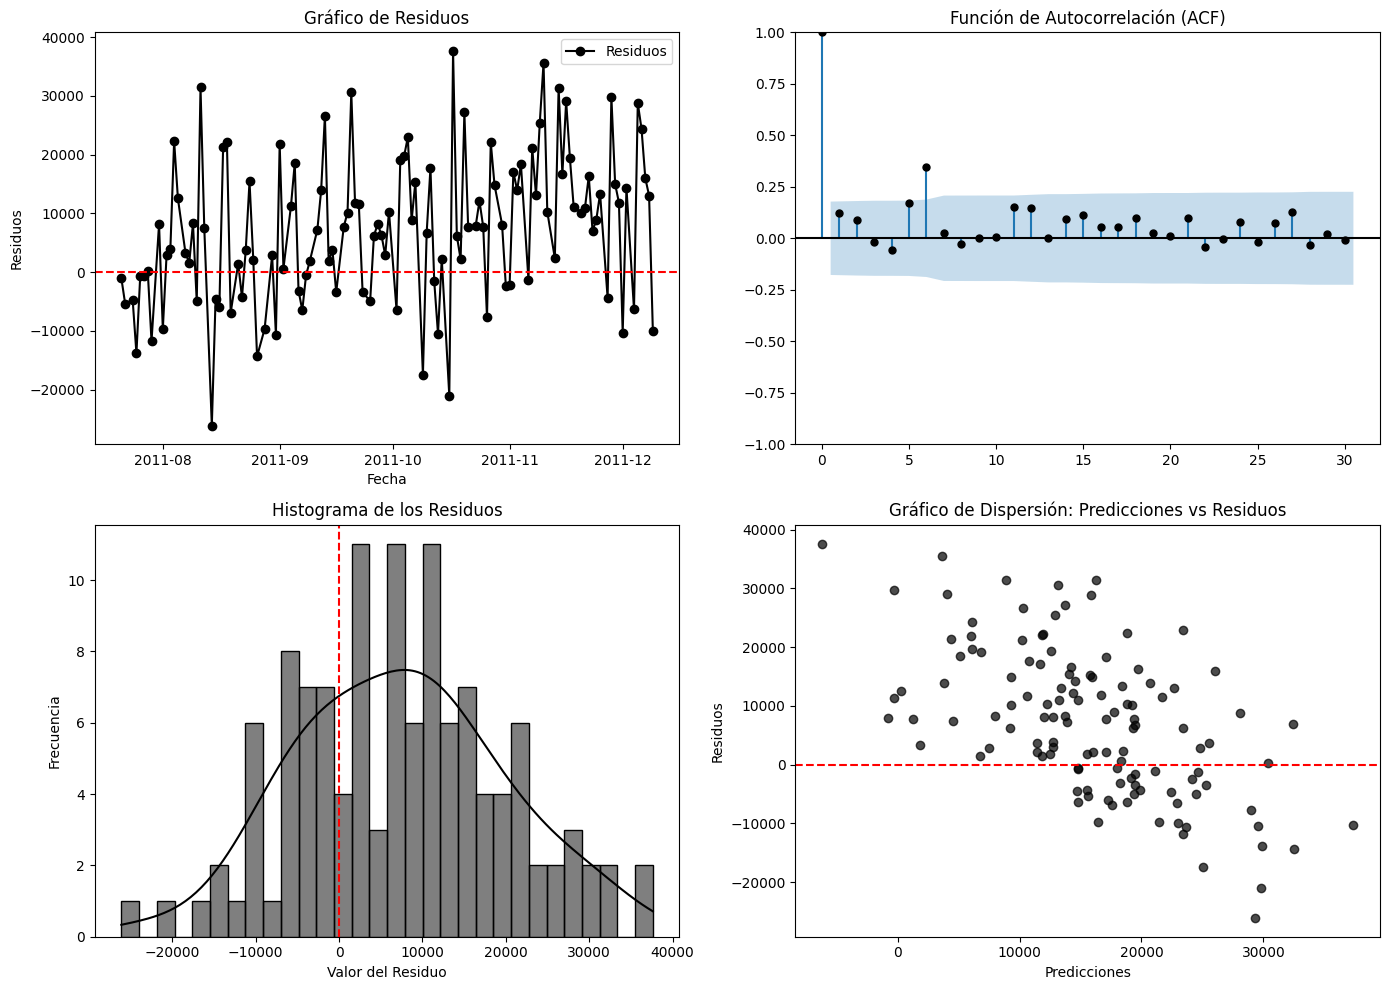

ljung_box_pvalor (p = 0.0108)
MSE (Error Cuadrático Medio): 207611618.3979
RMSE (Raíz del Error Cuadrático Medio): 14408.7341
MAE (Error Absoluto Medio): 11517.4015
MAPE (Error Porcentual Absoluto Medio): nan%


C:\Users\wmanj\AppData\Local\Temp\ipykernel_15920\938429540.py:68: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((test['Quantity'] - test_predictions_damped) / test['Quantity'])) * 100  # Error porcentual absoluto medio


In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Ajustar la longitud de las predicciones si es necesario
test_predictions_damped = test_predictions_damped[:len(test)]

# Calcular los residuos
residuos_holt_winters = test['Quantity'].values - test_predictions_damped

# Verificar dimensiones antes de graficar
print(f"Dimensión de test.index: {len(test.index)}")
print(f"Dimensión de residuos_holt_winters: {len(residuos_holt_winters)}")

# Configurar el tamaño del gráfico con 4 subgráficos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Gráfico de Residuos
axes[0, 0].plot(test.index, residuos_holt_winters, marker='o', linestyle='-', color='black', label="Residuos")
axes[0, 0].axhline(y=0, color='red', linestyle='dashed', linewidth=1.5)
axes[0, 0].set_title("Gráfico de Residuos")
axes[0, 0].set_xlabel("Fecha")
axes[0, 0].set_ylabel("Residuos")
axes[0, 0].legend()

# 2. Función de Autocorrelación (ACF)
plot_acf(residuos_holt_winters, lags=30, ax=axes[0, 1],color='black')
axes[0, 1].set_title("Función de Autocorrelación (ACF)")

# 3. Histograma de los Residuos con KDE
sns.histplot(residuos_holt_winters, bins=30, kde=True, ax=axes[1, 0], color='black')
axes[1, 0].axvline(x=0, color='red', linestyle='dashed', linewidth=1.5)
axes[1, 0].set_title("Histograma de los Residuos")
axes[1, 0].set_xlabel("Valor del Residuo")
axes[1, 0].set_ylabel("Frecuencia")

# 4. Gráfico de Dispersión: Predicciones vs Residuos
axes[1, 1].scatter(test_predictions_damped, residuos_holt_winters, color='black', alpha=0.7)
axes[1, 1].axhline(y=0, color='red', linestyle='dashed', linewidth=1.5)
axes[1, 1].set_title("Gráfico de Dispersión: Predicciones vs Residuos")
axes[1, 1].set_xlabel("Predicciones")
axes[1, 1].set_ylabel("Residuos")

# Ajustar diseño y mostrar
plt.tight_layout()
plt.show()

# Prueba de Ljung-Box
ljung_box_result = acorr_ljungbox(residuos_holt_winters, lags=[10], return_df=True)
ljung_box_pvalor = ljung_box_result["lb_pvalue"].values[0]

# Interpretación de la prueba de Ljung-Box
if ljung_box_pvalor < 0.05:
    print(f"ljung_box_pvalor (p = {ljung_box_pvalor:.4f})")
else:
    print(f" ljung_box_pvalor (p = {ljung_box_pvalor:.4f})")

# Calcular métricas
mse = mean_squared_error(test['Quantity'], test_predictions_damped)  # Error cuadrático medio
rmse = np.sqrt(mse)  # Raíz del error cuadrático medio
mae = mean_absolute_error(test['Quantity'], test_predictions_damped)  # Error absoluto medio

# Calcular MAPE
mape = np.mean(np.abs((test['Quantity'] - test_predictions_damped) / test['Quantity'])) * 100  # Error porcentual absoluto medio

# Mostrar métricas
print(f"MSE (Error Cuadrático Medio): {mse:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")
print(f"MAE (Error Absoluto Medio): {mae:.4f}")
print(f"MAPE (Error Porcentual Absoluto Medio): {mape:.4f}%")


In [119]:
from statsmodels.tsa.stattools import bds

# Asumiendo que 'residuos' es tu serie temporal de residuos (ya calculados previamente)
bds_statistic, bds_p_value = bds(residuos_holt_winters)

# Imprimir el estadístico del test y el valor p
print("Estadístico del test BDS:", bds_statistic)
print("Vbds_p_value BDS:", bds_p_value)


import numpy as np
import pandas as pd
from statsmodels.tools.eval_measures import rmse

# Asumimos que tienes las predicciones de tu modelo en `test_predictions` y los valores reales en `test['Quantity']`

# 1. Calcula los errores de los dos modelos
error_model = test['Quantity'] - test_predictions

# Usamos el modelo de referencia, en este caso, predicción de la media de la serie temporal
error_benchmark = test['Quantity'] - test['Quantity'].mean()

# 2. Calcula la diferencia entre los errores al cuadrado
# La fórmula de Diebold-Mariano utiliza las diferencias al cuadrado de los errores
d = (error_model ** 2) - (error_benchmark ** 2)

# 3. Calcular la estadística del test de Diebold-Mariano
# La estadística de Diebold-Mariano sigue una distribución normal asintótica bajo la hipótesis nula
dm_statistic = np.mean(d) / (np.std(d) / np.sqrt(len(d)))

# 4. Calcular el valor p (para pruebas de dos colas)
from scipy.stats import norm

# p-valor para una prueba de dos colas
dm_p_value = 2 * (1 - norm.cdf(np.abs(dm_statistic)))

# Imprimir los resultados del test Diebold-Mariano
print("Estadístico del test Diebold-Mariano:", dm_statistic)
print("Valor p del test Diebold-Mariano:", dm_p_value)


Estadístico del test BDS: 0.5943976588731897
Vbds_p_value BDS: 0.5522461739491367
Estadístico del test Diebold-Mariano: -0.602845548947347
Valor p del test Diebold-Mariano: 0.5466114422007278


Suavización exponencial de Holt-winters aditivo

C:\Users\wmanj\AppData\Local\Temp\ipykernel_15920\3099361826.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sinoutliers['InvoiceDate'] = pd.to_datetime(df_sinoutliers['InvoiceDate'])
c:\Users\wmanj\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\wmanj\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\wmanj\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning:

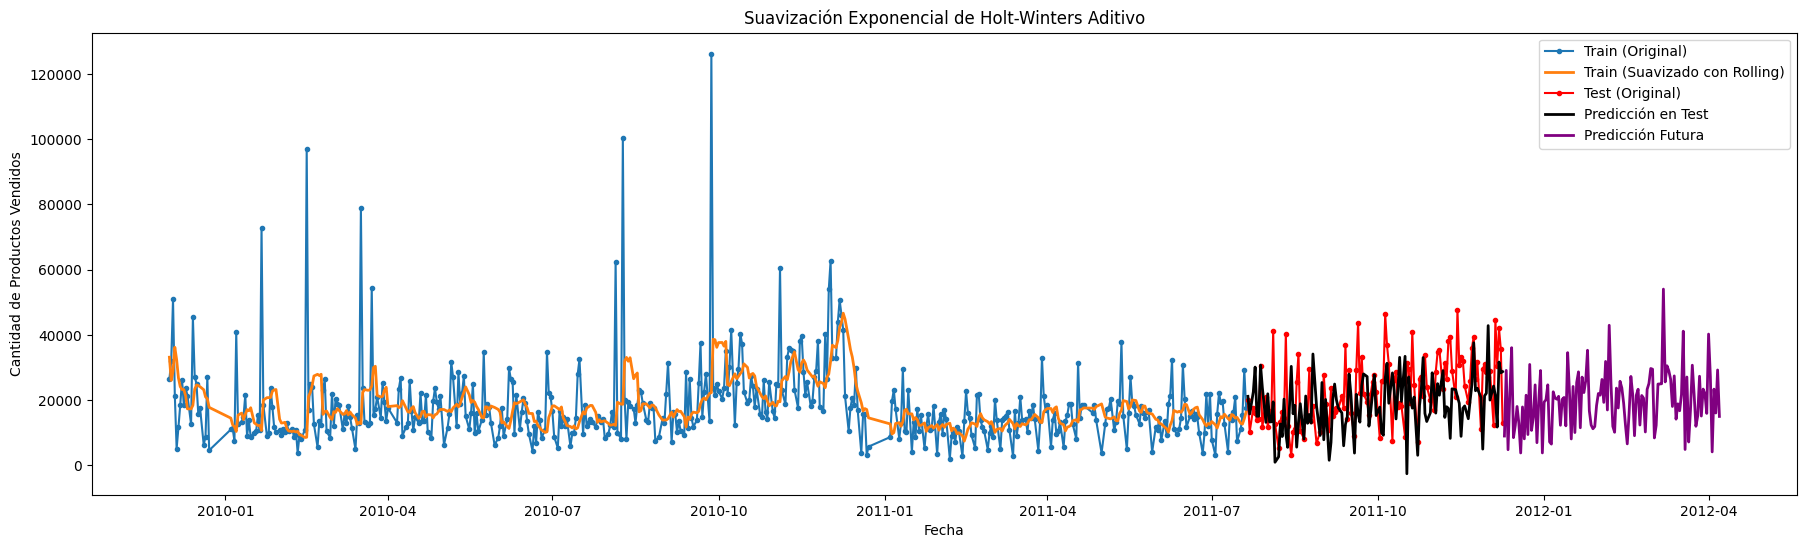

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Convertir 'InvoiceDate' en columna si está en el índice
if isinstance(df_sinoutliers.index, pd.DatetimeIndex):
    df_sinoutliers.reset_index(inplace=True)

# Asegurar que 'InvoiceDate' sea de tipo datetime
df_sinoutliers['InvoiceDate'] = pd.to_datetime(df_sinoutliers['InvoiceDate'])

# Agrupar por día y sumar la cantidad de productos vendidos
data_daily = df_sinoutliers.groupby(df_sinoutliers['InvoiceDate'].dt.date)['Quantity'].sum().reset_index()
data_daily['InvoiceDate'] = pd.to_datetime(data_daily['InvoiceDate'])
data_daily.set_index('InvoiceDate', inplace=True)

# Aplicar rolling mean para suavizar la serie antes de modelar
data_daily['Quantity_rolling'] = data_daily['Quantity'].rolling(window=7, min_periods=1).mean()

# División en train y test (80% - 20%)
split_index = int(len(data_daily) * 0.8)
train, test = data_daily[:split_index], data_daily[split_index:]

# Calcular la desviación estándar en una ventana móvil para preservar variabilidad
rolling_std_train = train['Quantity'].rolling(window=7, min_periods=1).std()
rolling_std_test = test['Quantity'].rolling(window=7, min_periods=1).std()

# Modelo Holt-Winters con tendencia aditiva (dos parámetros: nivel y tendencia)
holt_winters_model = ExponentialSmoothing(
    train['Quantity_rolling'], trend="add", seasonal=None, initialization_method="estimated"
).fit()

# Predicciones en test con variabilidad
test_predictions_holt = holt_winters_model.forecast(len(test))

# Añadir variabilidad basada en la desviación estándar de test
np.random.seed(42)
noise_test = np.random.normal(loc=0, scale=rolling_std_test.mean(), size=len(test_predictions_holt))
test_predictions_holt += noise_test

# Predicción a futuro con 120 días
num_days_forecast = 120
future_dates = pd.date_range(start=test.index[-1], periods=num_days_forecast + 1, freq='D')[1:]
future_forecast_holt = holt_winters_model.forecast(num_days_forecast)

# Añadir variabilidad basada en la desviación estándar de train
noise_future = np.random.normal(loc=0, scale=rolling_std_train.mean(), size=len(future_forecast_holt))
future_forecast_holt += noise_future

# 📊 Graficar los resultados con predicción en test mejorada y predicción futura sin cambios
plt.figure(figsize=(22, 6))
plt.plot(train.index, train['Quantity'], marker='o', linestyle='-', markersize=3, label='Train (Original)')
plt.plot(train.index, holt_winters_model.fittedvalues, linestyle='-', linewidth=2, label='Train (Suavizado con Rolling)')
plt.plot(test.index, test['Quantity'], marker='o', linestyle='-', markersize=3, label='Test (Original)', color='red')
plt.plot(test.index, test_predictions_holt, linestyle='-', linewidth=2, label='Predicción en Test', color='black')
plt.plot(future_dates, future_forecast_holt, linestyle='-', linewidth=2, color='purple', label='Predicción Futura')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Productos Vendidos')
plt.title('Suavización Exponencial de Holt-Winters Aditivo')
plt.legend()
plt.show()


c:\Users\wmanj\miniconda3\envs\ml_venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


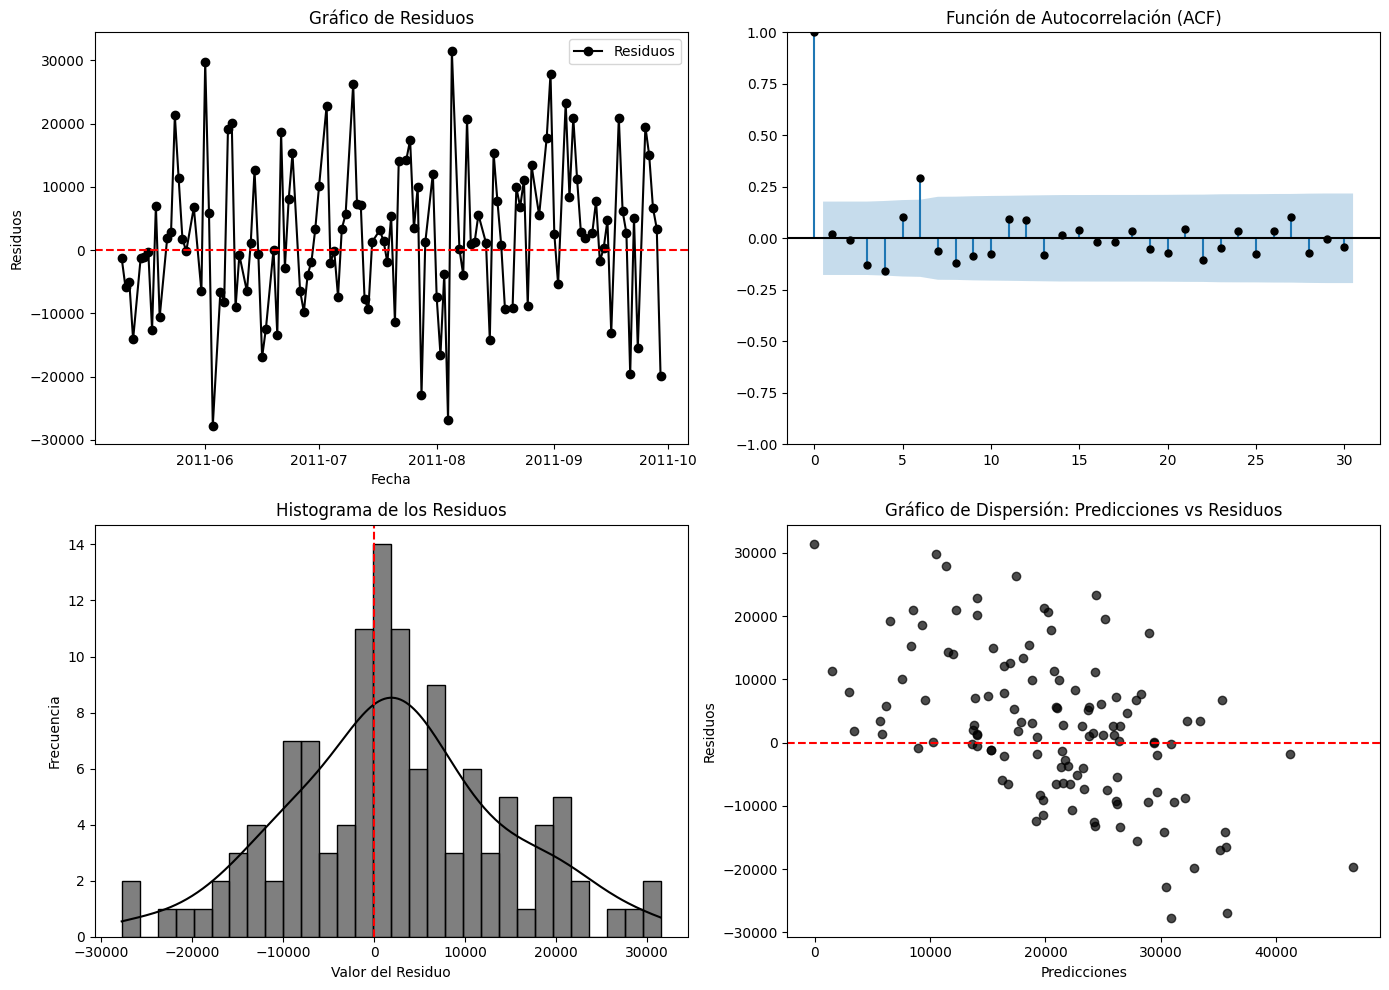

ljung_box_pvalor  (p = 0.0145)
MSE: 115735564.0272
RMSE: 10758.0465
MAE: 8466.5869
MAPE: 72.7528


In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Recortar test para coincidir con predicciones
test_trimmed = test.iloc[:len(test_predictions_holt)].copy()
test_trimmed = test_trimmed.iloc[:len(test_predictions_holt)] 

# Calcular los residuos
residuos_holt_wintersA = test_trimmed['Quantity'].values - test_predictions_holt[:len(test_trimmed)]

# Gráficos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].plot(test_trimmed.index, residuos_holt_winters, marker='o', linestyle='-', color='black', label="Residuos")
axes[0, 0].axhline(y=0, color='red', linestyle='dashed', linewidth=1.5)
axes[0, 0].set_title("Gráfico de Residuos")
axes[0, 0].set_xlabel("Fecha")
axes[0, 0].set_ylabel("Residuos")
axes[0, 0].legend()

plot_acf(residuos_holt_winters, lags=30, ax=axes[0, 1],color = 'black')
axes[0, 1].set_title("Función de Autocorrelación (ACF)")

sns.histplot(residuos_holt_winters, bins=30, kde=True, ax=axes[1, 0], color='black')
axes[1, 0].axvline(x=0, color='red', linestyle='dashed', linewidth=1.5)
axes[1, 0].set_title("Histograma de los Residuos")
axes[1, 0].set_xlabel("Valor del Residuo")
axes[1, 0].set_ylabel("Frecuencia")

axes[1, 1].scatter(test_predictions_holt[:len(residuos_holt_winters)], residuos_holt_winters, color='black', alpha=0.7)
axes[1, 1].axhline(y=0, color='red', linestyle='dashed', linewidth=1.5)
axes[1, 1].set_title("Gráfico de Dispersión: Predicciones vs Residuos")
axes[1, 1].set_xlabel("Predicciones")
axes[1, 1].set_ylabel("Residuos")

plt.tight_layout()
plt.show()

# Prueba de Ljung-Box
ljung_box_result = acorr_ljungbox(residuos_holt_winters, lags=[10], return_df=True)
ljung_box_pvalor = ljung_box_result["lb_pvalue"].values[0]

# Interpretación de la prueba de Ljung-Box
if ljung_box_pvalor < 0.05:
    print(f"ljung_box_pvalor  (p = {ljung_box_pvalor:.4f})")
else:
    print(f"ljung_box_pvalor (p = {ljung_box_pvalor:.4f})")

# Calcular métricas de error
mse = mean_squared_error(test_trimmed['Quantity'].values, test_predictions_holt[:len(test_trimmed)])
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_trimmed['Quantity'].values, test_predictions_holt[:len(test_trimmed)])

# Calcular MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((test_trimmed['Quantity'].values - test_predictions_holt[:len(test_trimmed)]) / test_trimmed['Quantity'].values)) * 100

# Mostrar las métricas
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}")


In [121]:
from statsmodels.tsa.stattools import bds

# Asumiendo que 'residuos' es tu serie temporal de residuos (ya calculados previamente)
bds_statistic, bds_p_value = bds(residuos_holt_wintersA)

# Imprimir el estadístico del test y el valor p
print("Estadístico del test BDS:", bds_statistic)
print("Vbds_p_value BDS:", bds_p_value)


import numpy as np
import pandas as pd
from statsmodels.tools.eval_measures import rmse

# Asumimos que tienes las predicciones de tu modelo en `test_predictions` y los valores reales en `test['Quantity']`

# 1. Calcula los errores de los dos modelos
error_model = test['Quantity'] - test_predictions

# Usamos el modelo de referencia, en este caso, predicción de la media de la serie temporal
error_benchmark = test['Quantity'] - test['Quantity'].mean()

# 2. Calcula la diferencia entre los errores al cuadrado
# La fórmula de Diebold-Mariano utiliza las diferencias al cuadrado de los errores
d = (error_model ** 2) - (error_benchmark ** 2)

# 3. Calcular la estadística del test de Diebold-Mariano
# La estadística de Diebold-Mariano sigue una distribución normal asintótica bajo la hipótesis nula
dm_statistic = np.mean(d) / (np.std(d) / np.sqrt(len(d)))

# 4. Calcular el valor p (para pruebas de dos colas)
from scipy.stats import norm

# p-valor para una prueba de dos colas
dm_p_value = 2 * (1 - norm.cdf(np.abs(dm_statistic)))

# Imprimir los resultados del test Diebold-Mariano
print("Estadístico del test Diebold-Mariano:", dm_statistic)
print("Valor p del test Diebold-Mariano:", dm_p_value)


Estadístico del test BDS: 2.354469192093239
Vbds_p_value BDS: 0.018549181239378168
Estadístico del test Diebold-Mariano: -0.602845548947347
Valor p del test Diebold-Mariano: 0.5466114422007278


Suavización exponencial de Holt-winters multiplicativo

C:\Users\wmanj\AppData\Local\Temp\ipykernel_15920\2583597350.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sinoutliers['InvoiceDate'] = pd.to_datetime(df_sinoutliers['InvoiceDate'])
c:\Users\wmanj\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\wmanj\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\wmanj\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning:

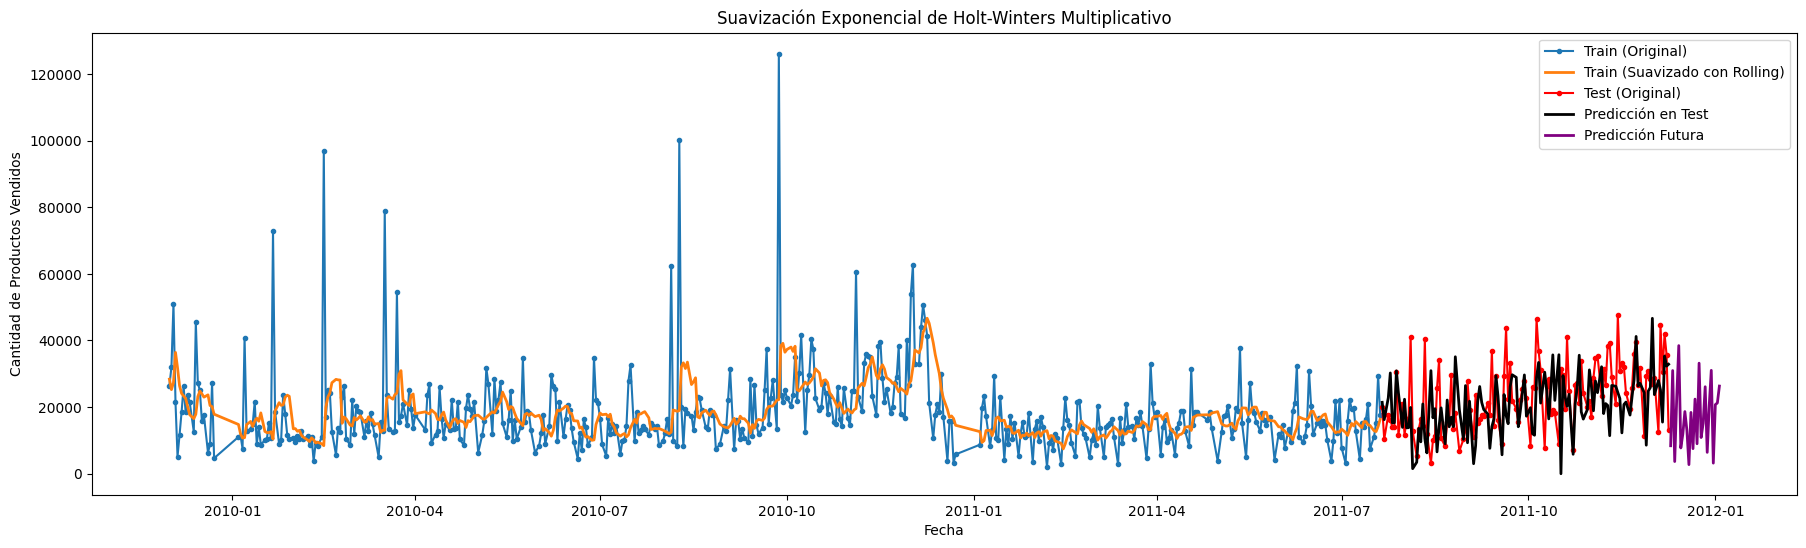

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Convertir 'InvoiceDate' en columna si está en el índice
if isinstance(df_sinoutliers.index, pd.DatetimeIndex):
    df_sinoutliers.reset_index(inplace=True)

# Asegurar que 'InvoiceDate' sea de tipo datetime
df_sinoutliers['InvoiceDate'] = pd.to_datetime(df_sinoutliers['InvoiceDate'])

# Agrupar por día y sumar la cantidad de productos vendidos
data_daily = df_sinoutliers.groupby(df_sinoutliers['InvoiceDate'].dt.date)['Quantity'].sum().reset_index()
data_daily['InvoiceDate'] = pd.to_datetime(data_daily['InvoiceDate'])
data_daily.set_index('InvoiceDate', inplace=True)

# Aplicar rolling mean para suavizar la serie antes de modelar
data_daily['Quantity_rolling'] = data_daily['Quantity'].rolling(window=7, min_periods=1).mean()

# División en train y test (80% - 20%)
split_index = int(len(data_daily) * 0.8)
train, test = data_daily[:split_index], data_daily[split_index:]

# Calcular la desviación estándar en una ventana móvil para preservar variabilidad
rolling_std_train = train['Quantity'].rolling(window=14, min_periods=1).std()
rolling_std_test = test['Quantity'].rolling(window=14, min_periods=1).std()

# Modelo Holt-Winters con tendencia aditiva y estacionalidad aditiva (tres parámetros: nivel, tendencia y estacionalidad)
holt_winters_model = ExponentialSmoothing(
    train['Quantity_rolling'], trend="add", seasonal="add", seasonal_periods=7, initialization_method="estimated"
).fit()

# Predicciones en test con variabilidad
test_predictions_holt = holt_winters_model.forecast(len(test))

# Añadir variabilidad basada en la desviación estándar de test
np.random.seed(42)
noise_test = np.random.normal(loc=0, scale=rolling_std_test.mean(), size=len(test_predictions_holt))
test_predictions_holt += noise_test

# Predicción a futuro con 25 días
num_days_forecast = 25
future_dates = pd.date_range(start=test.index[-1], periods=num_days_forecast + 1, freq='D')[1:]
future_forecast_holt = holt_winters_model.forecast(num_days_forecast)

# Añadir variabilidad basada en la desviación estándar de train
noise_future = np.random.normal(loc=0, scale=rolling_std_train.mean(), size=len(future_forecast_holt))
future_forecast_holt += noise_future

#  Graficar los resultados con predicción en test mejorada y predicción futura sin cambios
plt.figure(figsize=(22, 6))
plt.plot(train.index, train['Quantity'], marker='o', linestyle='-', markersize=3, label='Train (Original)')
plt.plot(train.index, holt_winters_model.fittedvalues, linestyle='-', linewidth=2, label='Train (Suavizado con Rolling)')
plt.plot(test.index, test['Quantity'], marker='o', linestyle='-', markersize=3, label='Test (Original)', color='red')
plt.plot(test.index, test_predictions_holt, linestyle='-', linewidth=2, label='Predicción en Test', color='black')
plt.plot(future_dates, future_forecast_holt, linestyle='-', linewidth=2, color='purple', label='Predicción Futura')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Productos Vendidos')
plt.title('Suavización Exponencial de Holt-Winters Multiplicativo')
plt.legend()
plt.show()

c:\Users\wmanj\miniconda3\envs\ml_venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


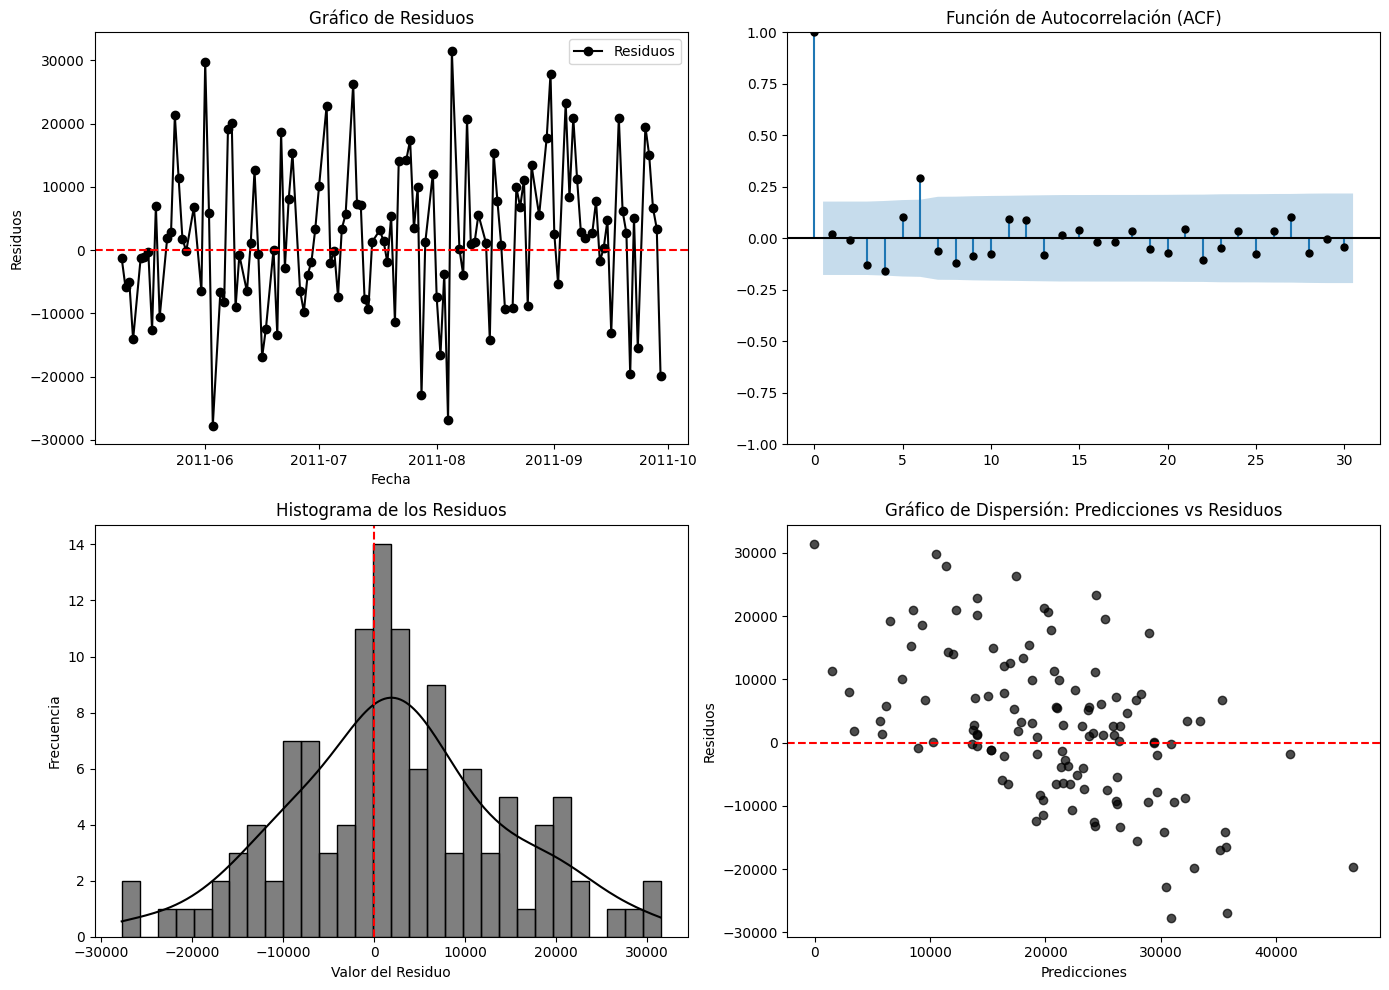

MSE (Error Cuadrático Medio): 115735564.0272
RMSE (Raíz del Error Cuadrático Medio): 10758.0465
MAE (Error Absoluto Medio): 8466.5869
MAPE (Error Porcentual Absoluto Medio): nan%
Prueba de Ljung-Box: p-value = 0.0145


C:\Users\wmanj\AppData\Local\Temp\ipykernel_15920\2518892119.py:42: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((test_trimmed['Quantity'] - test_predictions_holt[:len(test_trimmed)]) / test_trimmed['Quantity'])) * 100


In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

test_trimmed = test.iloc[:len(test_predictions_holt)].copy()  # Recortar test para coincidir con predicciones
residuos_holt_wintersM = test_trimmed['Quantity'].values - test_predictions_holt[:len(test_trimmed)]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].plot(test_trimmed.index, residuos_holt_winters, marker='o', linestyle='-', color='black', label="Residuos")
axes[0, 0].axhline(y=0, color='red', linestyle='dashed', linewidth=1.5)
axes[0, 0].set_title("Gráfico de Residuos")
axes[0, 0].set_xlabel("Fecha")
axes[0, 0].set_ylabel("Residuos")
axes[0, 0].legend()

plot_acf(residuos_holt_winters, lags=30, ax=axes[0, 1],color='black')
axes[0, 1].set_title("Función de Autocorrelación (ACF)")

sns.histplot(residuos_holt_winters, bins=30, kde=True, ax=axes[1, 0], color='black')
axes[1, 0].axvline(x=0, color='red', linestyle='dashed', linewidth=1.5)
axes[1, 0].set_title("Histograma de los Residuos")
axes[1, 0].set_xlabel("Valor del Residuo")
axes[1, 0].set_ylabel("Frecuencia")

axes[1, 1].scatter(test_predictions_holt[:len(residuos_holt_winters)], residuos_holt_winters, color='black', alpha=0.7)
axes[1, 1].axhline(y=0, color='red', linestyle='dashed', linewidth=1.5)
axes[1, 1].set_title("Gráfico de Dispersión: Predicciones vs Residuos")
axes[1, 1].set_xlabel("Predicciones")
axes[1, 1].set_ylabel("Residuos")

plt.tight_layout()
plt.show()

mse = mean_squared_error(test_trimmed['Quantity'], test_predictions_holt[:len(test_trimmed)])
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_trimmed['Quantity'], test_predictions_holt[:len(test_trimmed)])
mape = np.mean(np.abs((test_trimmed['Quantity'] - test_predictions_holt[:len(test_trimmed)]) / test_trimmed['Quantity'])) * 100

print(f"MSE (Error Cuadrático Medio): {mse:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")
print(f"MAE (Error Absoluto Medio): {mae:.4f}")
print(f"MAPE (Error Porcentual Absoluto Medio): {mape:.4f}%")

ljung_box_result = acorr_ljungbox(residuos_holt_winters, lags=[10], return_df=True)
ljung_box_pvalor = ljung_box_result["lb_pvalue"].values[0]

print(f"Prueba de Ljung-Box: p-value = {ljung_box_pvalor:.4f}")


In [124]:
from statsmodels.tsa.stattools import bds

# Asumiendo que 'residuos' es tu serie temporal de residuos (ya calculados previamente)
bds_statistic, bds_p_value = bds(residuos_holt_wintersM)

# Imprimir el estadístico del test y el valor p
print("Estadístico del test BDS:", bds_statistic)
print("Vbds_p_value BDS:", bds_p_value)


import numpy as np
import pandas as pd
from statsmodels.tools.eval_measures import rmse

# Asumimos que tienes las predicciones de tu modelo en `test_predictions` y los valores reales en `test['Quantity']`

# 1. Calcula los errores de los dos modelos
error_model = test['Quantity'] - test_predictions

# Usamos el modelo de referencia, en este caso, predicción de la media de la serie temporal
error_benchmark = test['Quantity'] - test['Quantity'].mean()

# 2. Calcula la diferencia entre los errores al cuadrado
# La fórmula de Diebold-Mariano utiliza las diferencias al cuadrado de los errores
d = (error_model ** 2) - (error_benchmark ** 2)

# 3. Calcular la estadística del test de Diebold-Mariano
# La estadística de Diebold-Mariano sigue una distribución normal asintótica bajo la hipótesis nula
dm_statistic = np.mean(d) / (np.std(d) / np.sqrt(len(d)))

# 4. Calcular el valor p (para pruebas de dos colas)
from scipy.stats import norm

# p-valor para una prueba de dos colas
dm_p_value = 2 * (1 - norm.cdf(np.abs(dm_statistic)))

# Imprimir los resultados del test Diebold-Mariano
print("Estadístico del test Diebold-Mariano:", dm_statistic)
print("Valor p del test Diebold-Mariano:", dm_p_value)


Estadístico del test BDS: 2.354469192093239
Vbds_p_value BDS: 0.018549181239378168
Estadístico del test Diebold-Mariano: -0.463662778128742
Valor p del test Diebold-Mariano: 0.6428893689431026


ARIMA 

C:\Users\wmanj\AppData\Local\Temp\ipykernel_15920\3955978276.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sinoutliers['InvoiceDate'] = pd.to_datetime(df_sinoutliers['InvoiceDate'])
c:\Users\wmanj\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\wmanj\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\wmanj\miniconda3\envs

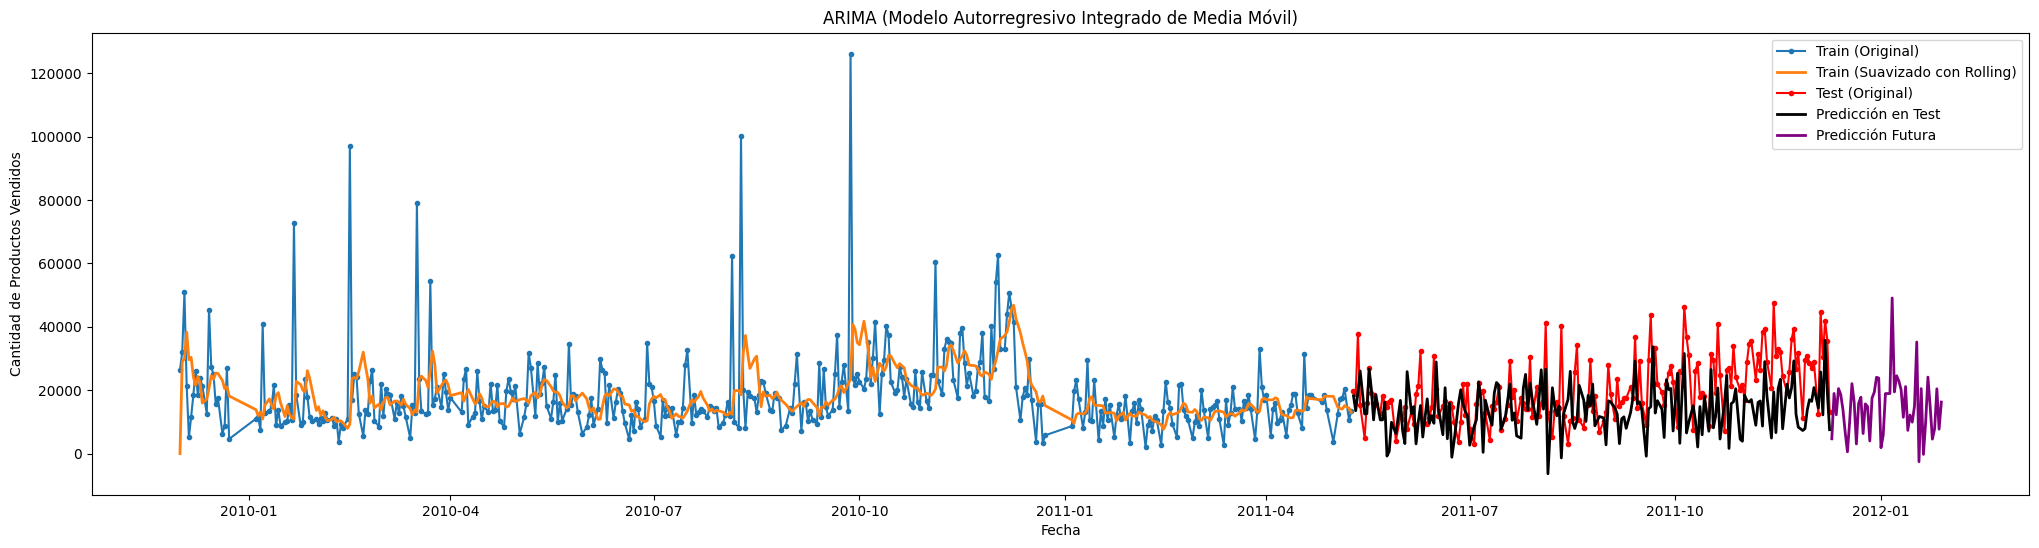

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Convertir 'InvoiceDate' en columna si está en el índice
if isinstance(df_sinoutliers.index, pd.DatetimeIndex):
    df_sinoutliers.reset_index(inplace=True)

# Asegurar que 'InvoiceDate' sea de tipo datetime
df_sinoutliers['InvoiceDate'] = pd.to_datetime(df_sinoutliers['InvoiceDate'])

# Agrupar por día y sumar la cantidad de productos vendidos
data_daily = df_sinoutliers.groupby(df_sinoutliers['InvoiceDate'].dt.date)['Quantity'].sum().reset_index()
data_daily['InvoiceDate'] = pd.to_datetime(data_daily['InvoiceDate'])
data_daily.set_index('InvoiceDate', inplace=True)

# Aplicar rolling mean para suavizar la serie antes de modelar
data_daily['Quantity_rolling'] = data_daily['Quantity'].rolling(window=7, min_periods=1).mean()

# División en train y test (70% - 30%)
split_index = int(len(data_daily) * 0.7)
train, test = data_daily[:split_index], data_daily[split_index:]

# Calcular la desviación estándar en una ventana móvil para preservar variabilidad
rolling_std_train = train['Quantity'].rolling(window=7, min_periods=1).std()
rolling_std_test = test['Quantity'].rolling(window=7, min_periods=1).std()

# Modelo ARIMA (p=5, d=1, q=2) ajustado a la serie suavizada
arima_model = ARIMA(train['Quantity_rolling'], order=(5, 1, 2)).fit()

# Predicciones en test con variabilidad
test_predictions_arima = arima_model.forecast(len(test))

# Añadir variabilidad basada en la desviación estándar de test
np.random.seed(42)
noise_test = np.random.normal(loc=0, scale=rolling_std_test.mean(), size=len(test_predictions_arima))
test_predictions_arima += noise_test

# Predicción a futuro con 50 días
num_days_forecast = 50
future_dates = pd.date_range(start=test.index[-1], periods=num_days_forecast + 1, freq='D')[1:]
future_forecast_arima = arima_model.forecast(num_days_forecast)

# Añadir variabilidad basada en la desviación estándar de train
noise_future = np.random.normal(loc=0, scale=rolling_std_train.mean(), size=len(future_forecast_arima))
future_forecast_arima += noise_future

# Graficar los resultados con predicción en test mejorada y predicción futura sin cambios
plt.figure(figsize=(25, 6))
plt.plot(train.index, train['Quantity'], marker='o', linestyle='-', markersize=3, label='Train (Original)')
plt.plot(train.index, arima_model.fittedvalues, linestyle='-', linewidth=2, label='Train (Suavizado con Rolling)')
plt.plot(test.index, test['Quantity'], marker='o', linestyle='-', markersize=3, label='Test (Original)', color='red')
plt.plot(test.index, test_predictions_arima, linestyle='-', linewidth=2, label='Predicción en Test', color='black')
plt.plot(future_dates, future_forecast_arima, linestyle='-', linewidth=2, color='purple', label='Predicción Futura')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Productos Vendidos')
plt.title('ARIMA (Modelo Autorregresivo Integrado de Media Móvil)')
plt.legend()
plt.show()


c:\Users\wmanj\miniconda3\envs\ml_venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


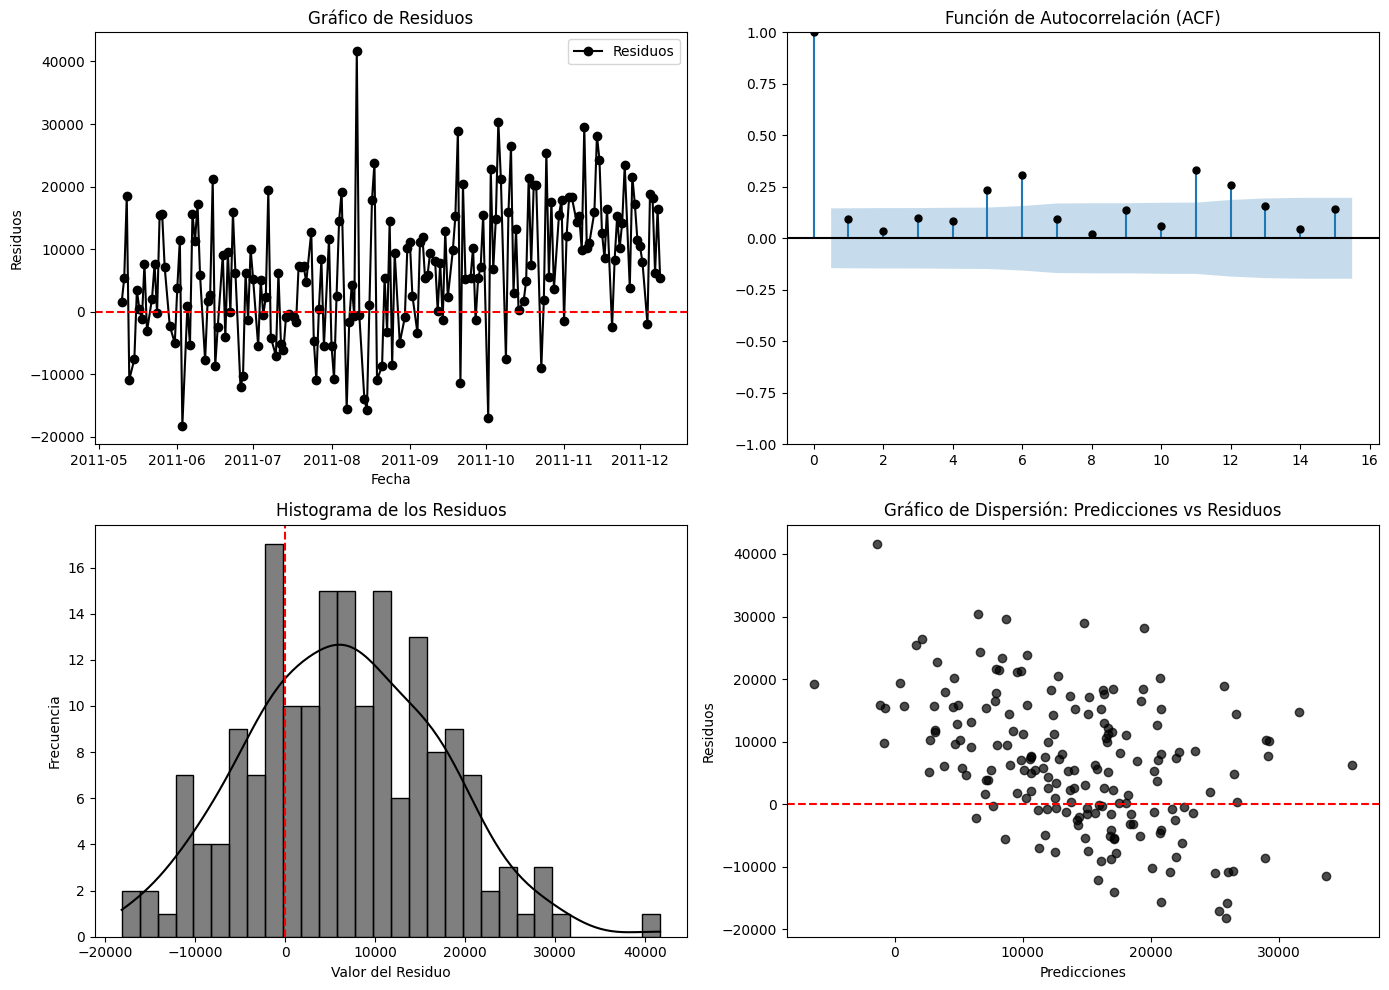

MAE: 9850.4669
MSE: 152041110.2768
RMSE: 12330.4951
MAPE: nan%
prueba de Ljung-Box(p = 0.0000)


C:\Users\wmanj\AppData\Local\Temp\ipykernel_15920\3071234844.py:55: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((test_trimmed['Quantity'] - test_predictions_arima[:len(test_trimmed)]) / test_trimmed['Quantity'])) * 100


In [77]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Asegurar que las dimensiones coincidan
test_trimmed = test.iloc[:len(test_predictions_arima)].copy()  # Recortar test para coincidir con predicciones
residuos_arima = test_trimmed['Quantity'].values - test_predictions_arima[:len(test_trimmed)]

# Configurar el tamaño del gráfico con 4 subgráficos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Gráfico de Residuos
axes[0, 0].plot(test_trimmed.index, residuos_arima, marker='o', linestyle='-', color='black', label="Residuos")
axes[0, 0].axhline(y=0, color='red', linestyle='dashed', linewidth=1.5)
axes[0, 0].set_title("Gráfico de Residuos")
axes[0, 0].set_xlabel("Fecha")
axes[0, 0].set_ylabel("Residuos")
axes[0, 0].legend()

# 2. Función de Autocorrelación (ACF)
plot_acf(residuos_arima, lags=15, ax=axes[0, 1],color = 'black')
axes[0, 1].set_title("Función de Autocorrelación (ACF)")

# 3. Histograma de los Residuos con KDE
sns.histplot(residuos_arima, bins=30, kde=True, ax=axes[1, 0], color='black')
axes[1, 0].axvline(x=0, color='red', linestyle='dashed', linewidth=1.5)
axes[1, 0].set_title("Histograma de los Residuos")
axes[1, 0].set_xlabel("Valor del Residuo")
axes[1, 0].set_ylabel("Frecuencia")

# 4. Gráfico de Dispersión: Predicciones vs Residuos
axes[1, 1].scatter(test_predictions_arima[:len(residuos_arima)], residuos_arima, color='black', alpha=0.7)
axes[1, 1].axhline(y=0, color='red', linestyle='dashed', linewidth=1.5)
axes[1, 1].set_title("Gráfico de Dispersión: Predicciones vs Residuos")
axes[1, 1].set_xlabel("Predicciones")
axes[1, 1].set_ylabel("Residuos")

# Ajustar diseño y mostrar
plt.tight_layout()
plt.show()

# Prueba de Ljung-Box
ljung_box_result = acorr_ljungbox(residuos_arima, lags=[10], return_df=True)
ljung_box_pvalor = ljung_box_result["lb_pvalue"].values[0]

# Interpretación de la prueba de Ljung-Box
if ljung_box_pvalor < 0.05:
    resultado_ljung_box_arima = f"prueba de Ljung-Box(p = {ljung_box_pvalor:.4f})"
else:
    resultado_ljung_box_arima = f"prueba de Ljung-Box (p = {ljung_box_pvalor:.4f})"

# Calcular las métricas de desempeño
mae = mean_absolute_error(test_trimmed['Quantity'], test_predictions_arima[:len(test_trimmed)])
mse = mean_squared_error(test_trimmed['Quantity'], test_predictions_arima[:len(test_trimmed)])
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test_trimmed['Quantity'] - test_predictions_arima[:len(test_trimmed)]) / test_trimmed['Quantity'])) * 100

# Mostrar las métricas
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.4f}%")

# Mostrar el resultado de la prueba de Ljung-Box
print(resultado_ljung_box_arima)


In [125]:
from statsmodels.tsa.stattools import bds

# Asumiendo que 'residuos' es tu serie temporal de residuos (ya calculados previamente)
bds_statistic, bds_p_value = bds(residuos_arima)

# Imprimir el estadístico del test y el valor p
print("Estadístico del test BDS:", bds_statistic)
print("Vbds_p_value BDS:", bds_p_value)


import numpy as np
import pandas as pd
from statsmodels.tools.eval_measures import rmse

# Asumimos que tienes las predicciones de tu modelo en `test_predictions` y los valores reales en `test['Quantity']`

# 1. Calcula los errores de los dos modelos
error_model = test['Quantity'] - test_predictions

# Usamos el modelo de referencia, en este caso, predicción de la media de la serie temporal
error_benchmark = test['Quantity'] - test['Quantity'].mean()

# 2. Calcula la diferencia entre los errores al cuadrado
# La fórmula de Diebold-Mariano utiliza las diferencias al cuadrado de los errores
d = (error_model ** 2) - (error_benchmark ** 2)

# 3. Calcular la estadística del test de Diebold-Mariano
# La estadística de Diebold-Mariano sigue una distribución normal asintótica bajo la hipótesis nula
dm_statistic = np.mean(d) / (np.std(d) / np.sqrt(len(d)))

# 4. Calcular el valor p (para pruebas de dos colas)
from scipy.stats import norm

# p-valor para una prueba de dos colas
dm_p_value = 2 * (1 - norm.cdf(np.abs(dm_statistic)))

# Imprimir los resultados del test Diebold-Mariano
print("Estadístico del test Diebold-Mariano:", dm_statistic)
print("Valor p del test Diebold-Mariano:", dm_p_value)


Estadístico del test BDS: 1.8442275268447208
Vbds_p_value BDS: 0.06514998831043133
Estadístico del test Diebold-Mariano: -0.463662778128742
Valor p del test Diebold-Mariano: 0.6428893689431026


In [78]:
pip install pmdarima


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [79]:
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.stats.diagnostic import acorr_ljungbox

# Parámetros de la ventana deslizante
window_size = 100  # Tamaño de la ventana (ajústalo según el tamaño de tu dataset)
step_size = 10  # Desplazamiento de la ventana
n_periods = len(test_trimmed)  # Número de periodos en el conjunto de test

# Listas para almacenar las métricas
ljung_box_pvals = []

# Aplicar Rolling Window
for start in range(0, n_periods - window_size, step_size):
    end = start + window_size
    train_data = test_trimmed['Quantity'].iloc[start:end]  # Datos de entrenamiento

    # Ajustar el modelo ARIMA en cada ventana
    modelo_arima_optimizado = auto_arima(train_data, seasonal=False, stepwise=True, trace=False)

    # Realizar predicciones
    test_predictions_arima_optimizado = modelo_arima_optimizado.predict(n_periods=step_size)

    # Asegurarse de que las predicciones tengan el tamaño adecuado
    test_values = test_trimmed['Quantity'].iloc[end:end + step_size].values  # Valores reales

    # Verificar si las predicciones y los valores reales tienen el mismo tamaño
    if len(test_predictions_arima_optimizado) != len(test_values):
        # Ajustar la predicción para que coincidan las longitudes
        diff_length = len(test_values) - len(test_predictions_arima_optimizado)
        if diff_length > 0:
            # Si la longitud de las predicciones es más corta, ajustamos
            test_predictions_arima_optimizado = np.concatenate([test_predictions_arima_optimizado, np.zeros(diff_length)])
        elif diff_length < 0:
            # Si la longitud de las predicciones es más larga, recortamos
            test_predictions_arima_optimizado = test_predictions_arima_optimizado[:len(test_values)]

    # Calcular los residuos
    residuos_arima_optimizado = test_values - test_predictions_arima_optimizado

    # Prueba de Ljung-Box sobre los residuos
    ljung_box_result = acorr_ljungbox(residuos_arima_optimizado, lags=[7], return_df=True)
    ljung_box_pvalor = ljung_box_result["lb_pvalue"].values[0]
    ljung_box_pvals.append(ljung_box_pvalor)

# Mostrar los resultados
for i, pvalor in enumerate(ljung_box_pvals):
    if pvalor < 0.05:
        print(f"Ventana {i+1}: ⚠️ Autocorrelación significativa (p = {pvalor:.4f})")
    else:
        print(f"Ventana {i+1}: ✅ No se detecta autocorrelación significativa (p = {pvalor:.4f})")


c:\Users\wmanj\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\wmanj\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\wmanj\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\wmanj\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported 

Ventana 1: ✅ No se detecta autocorrelación significativa (p = 0.2718)
Ventana 2: ✅ No se detecta autocorrelación significativa (p = 0.4762)
Ventana 3: ✅ No se detecta autocorrelación significativa (p = 0.2657)
Ventana 4: ✅ No se detecta autocorrelación significativa (p = 0.3318)
Ventana 5: ✅ No se detecta autocorrelación significativa (p = 0.6820)
Ventana 6: ✅ No se detecta autocorrelación significativa (p = 0.5325)
Ventana 7: ✅ No se detecta autocorrelación significativa (p = 0.7641)
Ventana 8: ✅ No se detecta autocorrelación significativa (p = 0.3053)
Ventana 9: ⚠️ Autocorrelación significativa (p = 0.0000)


c:\Users\wmanj\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\wmanj\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\wmanj\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\stats\diagnostic.py:463: RuntimeWarning: divide by zero encountered in divide
  sacf2 = sacf[1:maxlag + 1] ** 2 / (nobs - np.arange(1, maxlag + 1))


Cuando el modelo ARIMA no captura completamente las dependencias en los datos, como se observa en la ventana 9 donde se detecta autocorrelación significativa, hay varias estrategias y métodos alternativos que podríamos considerar para mejorar el ajuste del modelo y la calidad de las predicciones. pero cambiarimos de modelos ya que se intento optimizar y con rolling windows

Garch


C:\Users\wmanj\AppData\Local\Temp\ipykernel_15920\178911756.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sinoutliers['InvoiceDate'] = pd.to_datetime(df_sinoutliers['InvoiceDate'])
c:\Users\wmanj\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\wmanj\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\wmanj\miniconda3\envs\

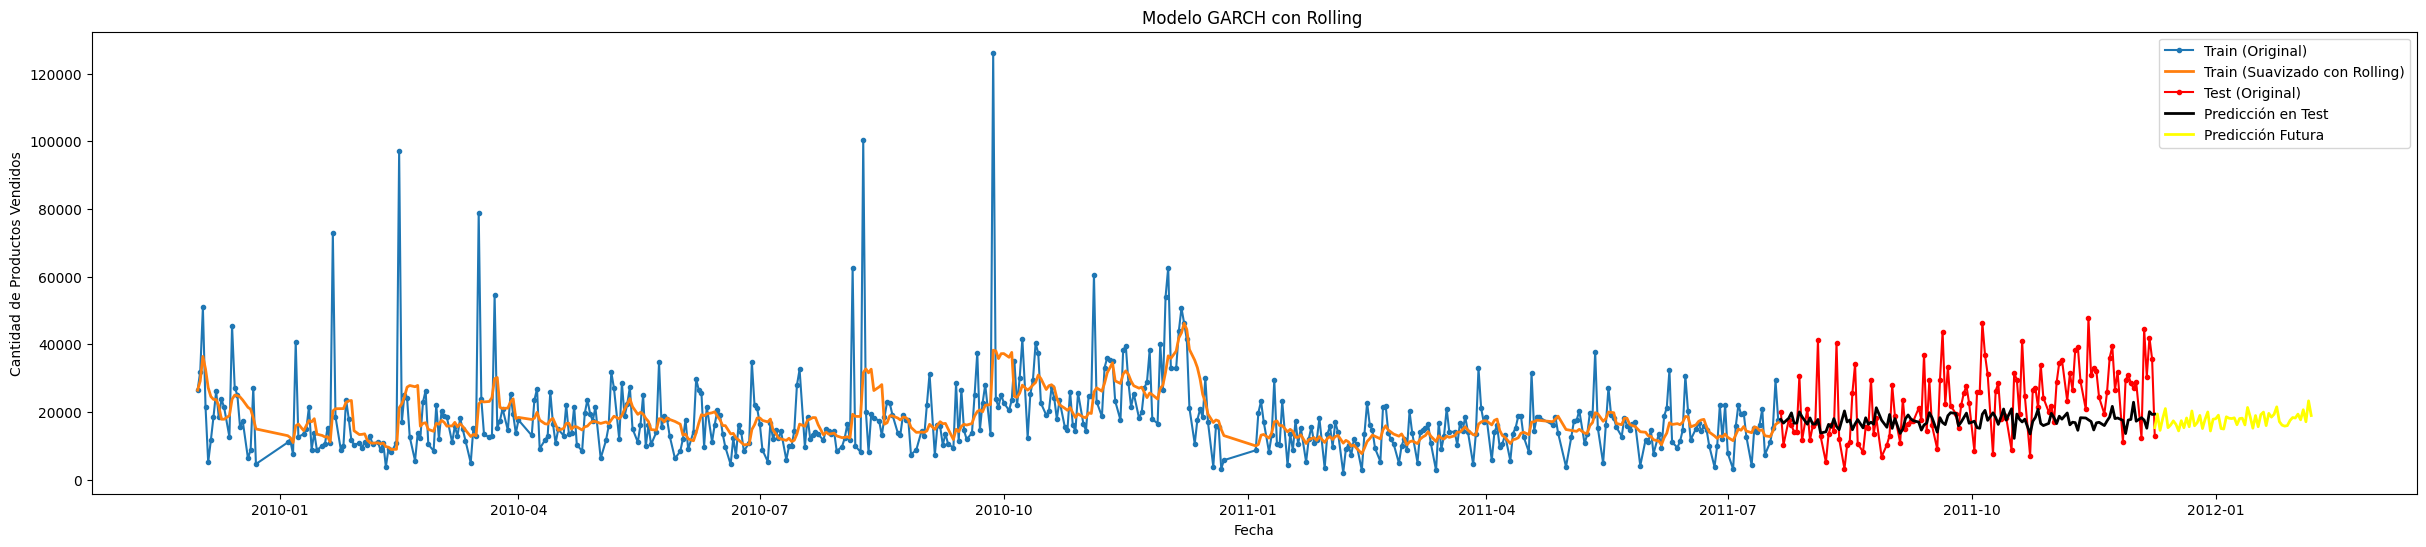

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model

# Convertir 'InvoiceDate' en columna si está en el índice
if isinstance(df_sinoutliers.index, pd.DatetimeIndex):
    df_sinoutliers.reset_index(inplace=True)

# Asegurar que 'InvoiceDate' sea de tipo datetime
df_sinoutliers['InvoiceDate'] = pd.to_datetime(df_sinoutliers['InvoiceDate'])

# Agrupar por día y sumar la cantidad de productos vendidos
data_daily = df_sinoutliers.groupby(df_sinoutliers['InvoiceDate'].dt.date)['Quantity'].sum().reset_index()
data_daily['InvoiceDate'] = pd.to_datetime(data_daily['InvoiceDate'])
data_daily.set_index('InvoiceDate', inplace=True)

# Aplicar rolling mean para suavizar la serie antes de modelar
data_daily['Quantity_rolling'] = data_daily['Quantity'].rolling(window=7, min_periods=1).mean()

# División en train y test (80% - 20%)
split_index = int(len(data_daily) * 0.8)
train, test = data_daily[:split_index], data_daily[split_index:]

# 🔹 **PASO 1: Ajustar modelo ARIMA en la serie suavizada**
arima_model = ARIMA(train['Quantity_rolling'], order=(2, 1, 2)).fit()
arima_train_predictions = arima_model.fittedvalues
arima_test_predictions = arima_model.forecast(len(test))

# Obtener residuos de ARIMA
arima_residuals = arima_model.resid

# 🔹 **PASO 2: Ajustar modelo GARCH sobre los residuos de ARIMA**
garch_model = arch_model(arima_residuals, vol='Garch', p=1, q=1)
garch_fit = garch_model.fit(disp="off")

# 🔹 **PASO 3: Predicción de la volatilidad con GARCH en test y futuro**
garch_forecast_test = garch_fit.forecast(horizon=len(test))
garch_volatility_test = np.sqrt(garch_forecast_test.variance.iloc[-1].values)  # ✅ Corrección

num_days_forecast = 60
garch_forecast_future = garch_fit.forecast(horizon=num_days_forecast)
garch_volatility_future = np.sqrt(garch_forecast_future.variance.iloc[-1].values)  # ✅ Corrección

# 🔹 **PASO 4: Generar predicciones combinando ARIMA y GARCH**
np.random.seed(42)
test_predictions_garch = arima_test_predictions + np.random.normal(0, garch_volatility_test, size=len(test))
future_forecast_garch = arima_model.forecast(num_days_forecast) + np.random.normal(0, garch_volatility_future, size=num_days_forecast)

# 📊 **PASO 5: Graficar los resultados**
plt.figure(figsize=(30, 6))
plt.plot(train.index, train['Quantity'], marker='o', linestyle='-', markersize=3, label='Train (Original)')
plt.plot(train.index, train['Quantity_rolling'], linestyle='-', linewidth=2, label='Train (Suavizado con Rolling)')
plt.plot(test.index, test['Quantity'], marker='o', linestyle='-', markersize=3, label='Test (Original)', color='red')
plt.plot(test.index, test_predictions_garch, linestyle='-', linewidth=2, label='Predicción en Test', color='black')
plt.plot(pd.date_range(start=test.index[-1], periods=num_days_forecast, freq='D'), 
         future_forecast_garch, linestyle='-', linewidth=2, color='yellow', label='Predicción Futura')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Productos Vendidos')
plt.title('Modelo GARCH con Rolling ')
plt.legend()
plt.show()



c:\Users\wmanj\miniconda3\envs\ml_venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


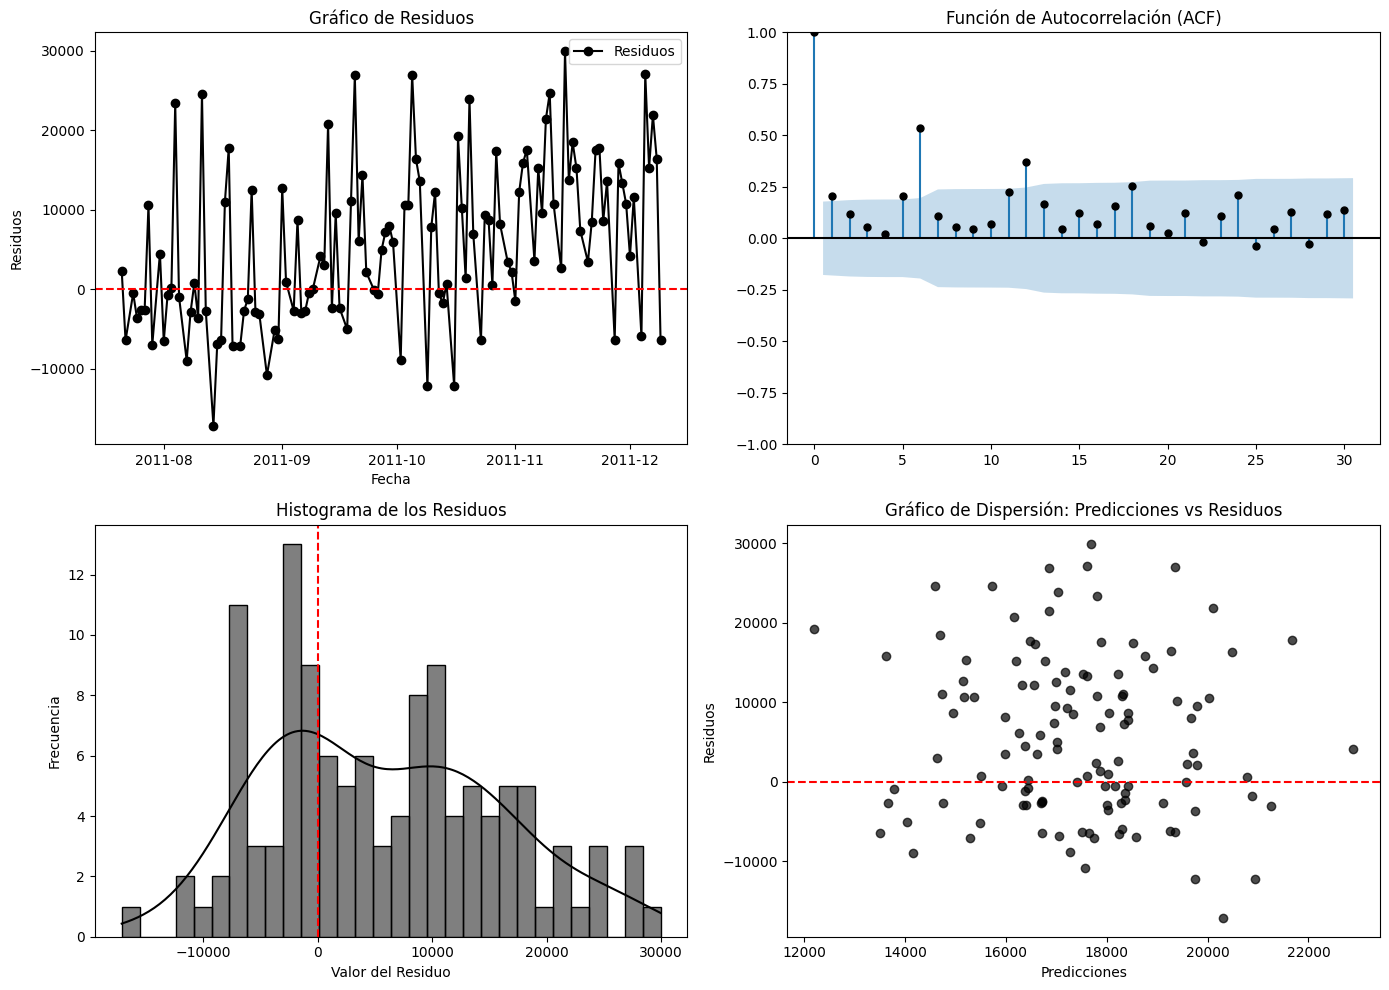

 MSE (Mean Squared Error): 132709046.4584
 RMSE (Root Mean Squared Error): 11519.9413
 MAE (Mean Absolute Error): 9046.2906
 MAPE (Mean Absolute Percentage Error): 0.4317
ljung_box_ (p = 0.0000)


In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Asegurar que las dimensiones coincidan
test_trimmed = test.iloc[:len(test_predictions_garch)].copy()  # Recortar test para coincidir con predicciones
residuos_garch = test_trimmed['Quantity'].values - test_predictions_garch[:len(test_trimmed)]

# Configurar el tamaño del gráfico con 4 subgráficos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))   

# 1. Gráfico de Residuos
axes[0, 0].plot(test_trimmed.index, residuos_garch, marker='o', linestyle='-', color='black', label="Residuos")
axes[0, 0].axhline(y=0, color='red', linestyle='dashed', linewidth=1.5)
axes[0, 0].set_title("Gráfico de Residuos")
axes[0, 0].set_xlabel("Fecha")
axes[0, 0].set_ylabel("Residuos")
axes[0, 0].legend()

# 2. Función de Autocorrelación (ACF)
plot_acf(residuos_garch, lags=30, ax=axes[0, 1],color='black')
axes[0, 1].set_title("Función de Autocorrelación (ACF)")

# 3. Histograma de los Residuos con KDE
sns.histplot(residuos_garch, bins=30, kde=True, ax=axes[1, 0], color='black')
axes[1, 0].axvline(x=0, color='red', linestyle='dashed', linewidth=1.5)
axes[1, 0].set_title("Histograma de los Residuos")
axes[1, 0].set_xlabel("Valor del Residuo")
axes[1, 0].set_ylabel("Frecuencia")

# 4. Gráfico de Dispersión: Predicciones vs Residuos
axes[1, 1].scatter(test_predictions_garch[:len(residuos_garch)], residuos_garch, color='black', alpha=0.7)
axes[1, 1].axhline(y=0, color='red', linestyle='dashed', linewidth=1.5)
axes[1, 1].set_title("Gráfico de Dispersión: Predicciones vs Residuos")
axes[1, 1].set_xlabel("Predicciones")
axes[1, 1].set_ylabel("Residuos")

# Ajustar diseño y mostrar
plt.tight_layout()
plt.show()

# Prueba de Ljung-Box
ljung_box_result = acorr_ljungbox(residuos_garch, lags=[10], return_df=True)
ljung_box_pvalor = ljung_box_result["lb_pvalue"].values[0]

# Interpretación de la prueba de Ljung-Box
if ljung_box_pvalor < 0.05:
    resultado_ljung_box_garch = f"ljung_box_ (p = {ljung_box_pvalor:.4f})"
else:
    resultado_ljung_box_garch = f" ljung_box_(p = {ljung_box_pvalor:.4f})"

# Cálculo de métricas de error
mse = mean_squared_error(test_trimmed['Quantity'], test_predictions_garch[:len(test_trimmed)])
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_trimmed['Quantity'], test_predictions_garch[:len(test_trimmed)])
mape = mean_absolute_percentage_error(test_trimmed['Quantity'], test_predictions_garch[:len(test_trimmed)])

# Imprimir resultados de las métricas
print(f" MSE (Mean Squared Error): {mse:.4f}")
print(f" RMSE (Root Mean Squared Error): {rmse:.4f}")
print(f" MAE (Mean Absolute Error): {mae:.4f}")
print(f" MAPE (Mean Absolute Percentage Error): {mape:.4f}")

# Mostrar el resultado de la prueba de Ljung-Box
print(resultado_ljung_box_garch)


In [130]:
from statsmodels.tsa.stattools import bds

# Asumiendo que 'residuos' es tu serie temporal de residuos (ya calculados previamente)
bds_statistic, bds_p_value = bds(residuos_garch)

# Imprimir el estadístico del test y el valor p
print("Estadístico del test BDS:", bds_statistic)
print("Vbds_p_value BDS:", bds_p_value)


import numpy as np
import pandas as pd
from statsmodels.tools.eval_measures import rmse

# Asumimos que tienes las predicciones de tu modelo en `test_predictions` y los valores reales en `test['Quantity']`

# 1. Calcula los errores de los dos modelos
error_model = test['Quantity'] - test_predictions

# Usamos el modelo de referencia, en este caso, predicción de la media de la serie temporal
error_benchmark = test['Quantity'] - test['Quantity'].mean()

# 2. Calcula la diferencia entre los errores al cuadrado
# La fórmula de Diebold-Mariano utiliza las diferencias al cuadrado de los errores
d = (error_model ** 2) - (error_benchmark ** 2)

# 3. Calcular la estadística del test de Diebold-Mariano
# La estadística de Diebold-Mariano sigue una distribución normal asintótica bajo la hipótesis nula
dm_statistic = np.mean(d) / (np.std(d) / np.sqrt(len(d)))

# 4. Calcular el valor p (para pruebas de dos colas)
from scipy.stats import norm

# p-valor para una prueba de dos colas
dm_p_value = 2 * (1 - norm.cdf(np.abs(dm_statistic)))

# Imprimir los resultados del test Diebold-Mariano
print("Estadístico del test Diebold-Mariano:", dm_statistic)
print("Valor p del test Diebold-Mariano:", dm_p_value)


Estadístico del test BDS: 1.4824217333186498
Vbds_p_value BDS: 0.13822811467537668
Estadístico del test Diebold-Mariano: -0.463662778128742
Valor p del test Diebold-Mariano: 0.6428893689431026
